In [249]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [252]:
#read the loan data csv
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Understanding and Cleaning

In [255]:
# get the column names
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [257]:
#get data shape
df.shape

(39717, 111)

In [259]:
# get data description
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Cleaning columns with all Null Values

In [262]:
#get the columns with null values greater than 0
#Calculate the number of null values per column
null_sum = df.isnull().sum()
#Identify columns with null values greater than 10,000
null_sum_filtered = null_sum[null_sum > 0]
print(null_sum_filtered)

emp_title                          2459
emp_length                         1075
desc                              12942
title                                11
mths_since_last_delinq            25682
mths_since_last_record            36931
revol_util                           50
last_pymnt_d                         71
next_pymnt_d                      38577
last_credit_pull_d                    2
collections_12_mths_ex_med           56
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717


In [264]:
# Drop columns with all NA values
df = df.dropna(axis=1, how='all')

In [266]:
#again check the columns with null values greater than 0
null_sum = df.isnull().sum()
null_sum_filtered = null_sum[null_sum > 0]
print(null_sum_filtered)

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64


## Cleaning columns with Null Values greater than 10000

In [269]:
#drop the columns with null values greater than 10000
#Calculate the number of null values per column
null_counts = df.isnull().sum()

#Identify columns with null values greater than 10,000
columns_to_drop = null_counts[null_counts > 10000].index

#Drop these columns
df = df.drop(columns=columns_to_drop)

In [271]:
#again check the columns with null values greater than 0
null_sum = df.isnull().sum()
null_sum_filtered = null_sum[null_sum > 0]
print(null_sum_filtered)

emp_title                     2459
emp_length                    1075
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64


In [273]:
#get the number of null values
df.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

## Data handling in columns

### 'application_type' column

In [277]:
#analyse 'application_type' values
df.application_type.value_counts()

application_type
INDIVIDUAL    39717
Name: count, dtype: int64

In [279]:
##drop 'application type' column as it has only 'INDIVIDUAL' value
df = df.drop(columns=['application_type'])

### 'tax_liens' column

In [282]:
#analyse 'tax_liens' values
df.tax_liens.value_counts()

tax_liens
0.0    39678
Name: count, dtype: int64

In [284]:
df[np.isnan(df['tax_liens'])].shape

(39, 52)

In [286]:
# 39678+39 = 39717 which is total number of rows. that means, either the value is 0.0 or null so we drop the column
df = df.drop(columns=['tax_liens'])

### 'chargeoff_within_12_mths' column

In [289]:
df.chargeoff_within_12_mths.value_counts()

chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64

In [291]:
df[np.isnan(df['chargeoff_within_12_mths'])].shape

(56, 51)

In [293]:
# 39661+56 = 39717 which is total number of rows. that means, either the value is 0.0 or null so we drop the column
df = df.drop(columns=['chargeoff_within_12_mths'])

### 'collections_12_mths_ex_med' column

In [296]:
df.collections_12_mths_ex_med.value_counts()

collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64

In [298]:
df[np.isnan(df['collections_12_mths_ex_med'])].shape

(56, 50)

In [300]:
# 39661+56 = 39717 which is total number of rows. that means, either the value is 0.0 or null so we drop the column
df = df.drop(columns=['collections_12_mths_ex_med'])

In [302]:
#get the number of null values
df.isnull().sum()


id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_ac

### 'delinq_amnt' column, 'acc_now_delinq' column

In [305]:
df.delinq_amnt.value_counts()

delinq_amnt
0    39717
Name: count, dtype: int64

In [307]:

df.acc_now_delinq.value_counts()

acc_now_delinq
0    39717
Name: count, dtype: int64

In [309]:
# all values are 0 so we drop the column
df = df.drop(columns=['delinq_amnt'])
df = df.drop(columns=['acc_now_delinq'])

### 'policy_code' column

In [312]:
df.policy_code.value_counts()

policy_code
1    39717
Name: count, dtype: int64

In [314]:
##drop 'policy_code ty' column as it has only '1' value
df = df.drop(columns=['policy_code'])

In [316]:
#get the number of null values
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_ac

## Sanity Checks

### Exploring 'int-rate' column

In [320]:
# manipulate and change the dtype of 'int_rate'
df["int_rate"].value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
7.49%     656
11.71%    607
9.99%     603
7.90%     582
5.42%     573
11.99%    532
12.69%    491
10.37%    468
6.03%     447
12.99%    446
8.49%     445
12.42%    442
10.65%    435
5.79%     410
8.90%     402
7.29%     397
6.62%     396
11.86%    391
14.27%    390
10.59%    380
9.63%     378
9.91%     377
5.99%     347
7.14%     341
6.99%     336
11.11%    331
12.53%    327
16.77%    327
10.74%    312
6.54%     305
6.91%     303
8.94%     294
7.66%     292
13.61%    291
15.99%    286
13.98%    284
13.23%    263
11.12%    259
13.99%    257
6.17%     252
10.00%    251
12.68%    251
10.75%    250
10.36%    250
11.36%    247
16.49%    241
11.83%    233
18.25%    230
10.62%    228
14.65%    222
13.06%    220
10.38%    219
10.25%    218
15.23%    215
14.96%    214
16.89%    209
15.65%    208
11.14%    206
6.92%     204
12.18%    203
17.27%    203
15.27%    200
15.95%    199
16.32%    198
14.79%    192
8.00%     1

In [322]:
df.int_rate = df.int_rate.str.replace("%","").astype('float64')

In [324]:
df["int_rate"].value_counts()

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
7.49     656
11.71    607
9.99     603
7.90     582
5.42     573
11.99    532
12.69    491
10.37    468
6.03     447
12.99    446
8.49     445
12.42    442
10.65    435
5.79     410
8.90     402
7.29     397
6.62     396
11.86    391
14.27    390
10.59    380
9.63     378
9.91     377
5.99     347
7.14     341
6.99     336
11.11    331
12.53    327
16.77    327
10.74    312
6.54     305
6.91     303
8.94     294
7.66     292
13.61    291
15.99    286
13.98    284
13.23    263
11.12    259
13.99    257
6.17     252
10.00    251
12.68    251
10.75    250
10.36    250
11.36    247
16.49    241
11.83    233
18.25    230
10.62    228
14.65    222
13.06    220
10.38    219
10.25    218
15.23    215
14.96    214
16.89    209
15.65    208
11.14    206
6.92     204
12.18    203
17.27    203
15.27    200
15.95    199
16.32    198
14.79    192
8.00     191
17.49    190
12.73    187
15.21    187
9.62     186
15.58    185
9.3

### The 'total amount committed to that loan' and 'total amount committed by investors for that loan' should be less than equal to 'loan amount requested'

In [327]:
df[df.funded_amnt>df.loan_amnt]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [329]:
df[df.funded_amnt_inv>df.loan_amnt]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


### removing the null value rows for 'emp_length' column as they are very less compared to the total number of rows

In [332]:
df["emp_length"].isnull().sum()

1075

In [334]:
df = df[~df["emp_length"].isnull()]

In [336]:
df["emp_length"].isnull().sum()

0

### removing the null value rows for 'last_pymnt_d' column as they are very less compared to the total number of rows

In [339]:
df["last_pymnt_d"].isnull().sum()

66

In [341]:
df = df[~df["last_pymnt_d"].isnull()]

In [343]:
df["last_pymnt_d"].isnull().sum()

0

### removing the null value rows for 'pub_rec_bankruptcies' column as they are very less compared to the total number of rows

In [346]:
df["pub_rec_bankruptcies"].isnull().sum()

697

In [348]:
df = df[~df["pub_rec_bankruptcies"].isnull()]

In [350]:
df["pub_rec_bankruptcies"].isnull().sum()

0

## Filtering Data

### removing columns irrelevant to analysis

columns which are updated after loan approvals and will not make sense in analysis
1. total_pymnt
2. total_pymnt_inv
3. total_rec_prncp
4. total_rec_int
5. total_rec_late_fee
6. recoveries
7. collection_recovery_fee
8. last_pymnt_d
9. last_pymnt_amnt
10. last_credit_pull_d

In [355]:
# remove columns - 'funded_amnt_inv', 'emp_title', 'pymnt_plan', 'url','title', 'zip_code', 
#'revol_bal', 'revol_util','initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
#'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'

In [357]:
columnstodrop = ['funded_amnt_inv', 'emp_title', 'pymnt_plan', 'url','title', 'zip_code', 
'revol_bal', 'revol_util','initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']
df = df.drop(columns=columnstodrop)

In [359]:
df.shape

(37879, 25)

In [361]:
# Check if there are any duplicates
has_duplicates = df.duplicated().any()
print(has_duplicates) # Output: False, means no duplicate records

False


### There are no duplicate records in the data

In [364]:
df.isnull().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

### check all data types and change if needed

In [367]:
df.dtypes

id                        int64
member_id                 int64
loan_amnt                 int64
funded_amnt               int64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [371]:
#Converting to date datatype
df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df.earliest_cr_line, format='%b-%y')

In [373]:
df.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
total_acc                        int64
pub_rec_bankruptcies           float64
dtype: object

### Create derived variable by Split data fields to year, month,weekday

In [380]:
df['issued_year']= df.issue_d.dt.year
df['issued_year']=df.issued_year.astype(object)
df['issued_month'] = df.issue_d.dt.strftime('%b')
df['issued_weekday'] = (df.issue_d.dt.weekday).astype(object)

#second field 'earliest_cr_line' 
df['earliest_cr_year']= (df.issue_d.dt.year).astype(object)
df['earliest_cr_month']= df.issue_d.dt.strftime('%b')
df['earliest_cr_weekday']= (df.issue_d.dt.weekday).astype(object)


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37879 entries, 0 to 39680
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    37879 non-null  int64         
 1   member_id             37879 non-null  int64         
 2   loan_amnt             37879 non-null  int64         
 3   funded_amnt           37879 non-null  int64         
 4   term                  37879 non-null  object        
 5   int_rate              37879 non-null  float64       
 6   installment           37879 non-null  float64       
 7   grade                 37879 non-null  object        
 8   sub_grade             37879 non-null  object        
 9   emp_length            37879 non-null  object        
 10  home_ownership        37879 non-null  object        
 11  annual_inc            37879 non-null  float64       
 12  verification_status   37879 non-null  object        
 13  issue_d              

In [386]:
df.isnull().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
total_acc               0
pub_rec_bankruptcies    0
issued_year             0
issued_month            0
issued_weekday          0
earliest_cr_year        0
earliest_cr_month       0
earliest_cr_weekday     0
dtype: int64

In [400]:
num_cols = ['loan_amnt', 'int_rate','installment','annual_inc','dti','open_acc','total_acc']
cat_cols = ['term','grade','sub_grade', 'emp_length','home_ownership','verification_status','issue_d', 'loan_status','purpose',
            'addr_state', 'delinq_2yrs','inq_last_6mths',
            'pub_rec','pub_rec_bankruptcies','issued_year','issued_month','issued_weekday','earliest_cr_year','earliest_cr_month',
            'earliest_cr_weekday']
extra_cols = ['id', 'member_id', 'funded_amnt','earliest_cr_line']
len(num_cols)+len(cat_cols)+len(extra_cols)

31

In [402]:
df.shape

(37879, 31)

## Finally fetching the data of defaulters only for the analysis i.e loan_status='Charged Off'

In [177]:
df_defaulters = df[df["loan_status"]=="Charged Off"]
df_defaulters.shape

(5215, 27)

## Univariate Analysis

#### Categorical

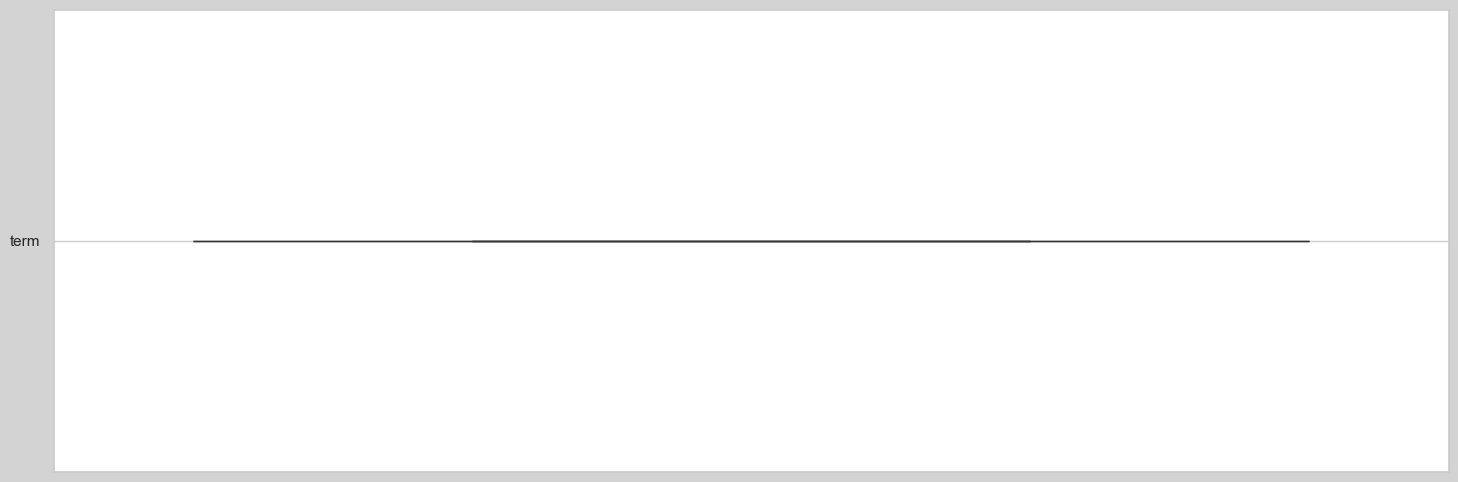

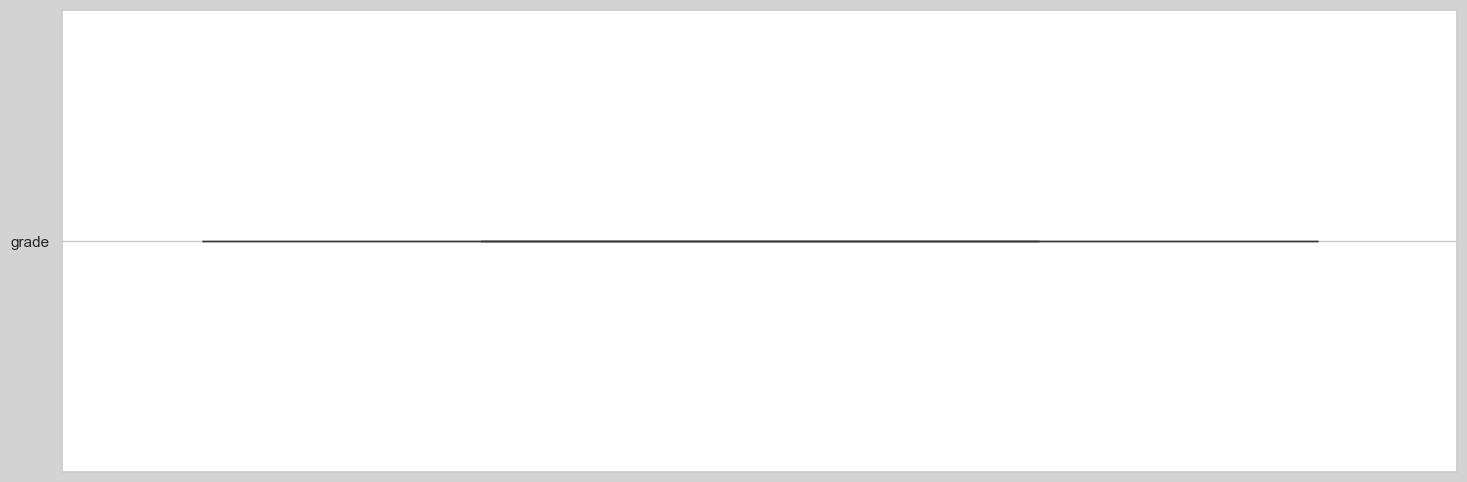

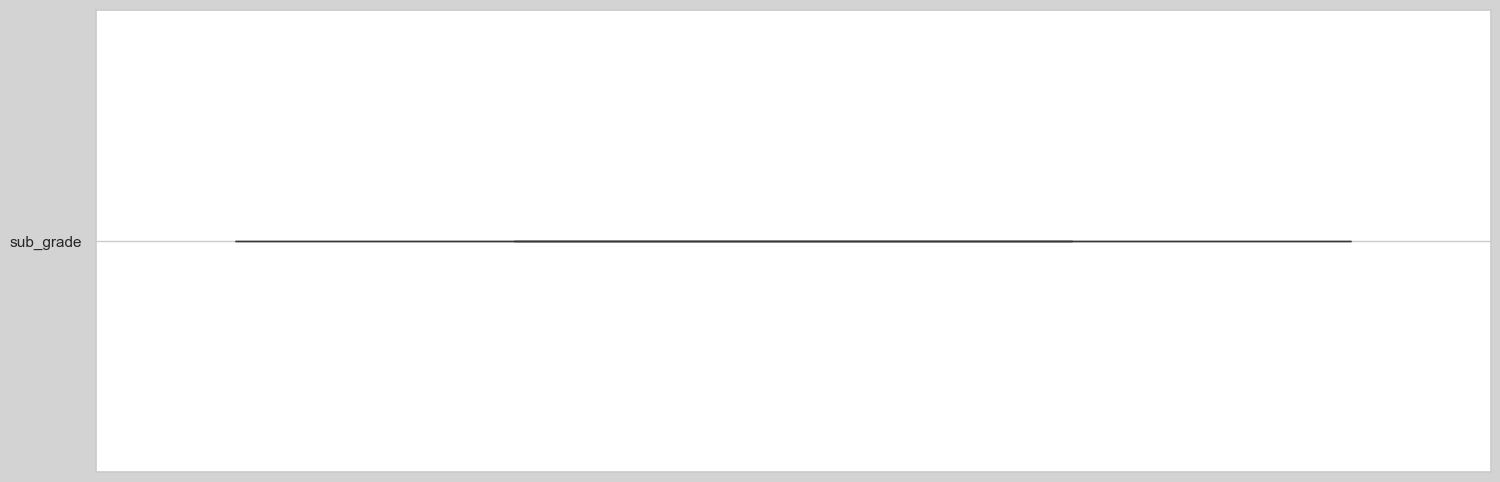

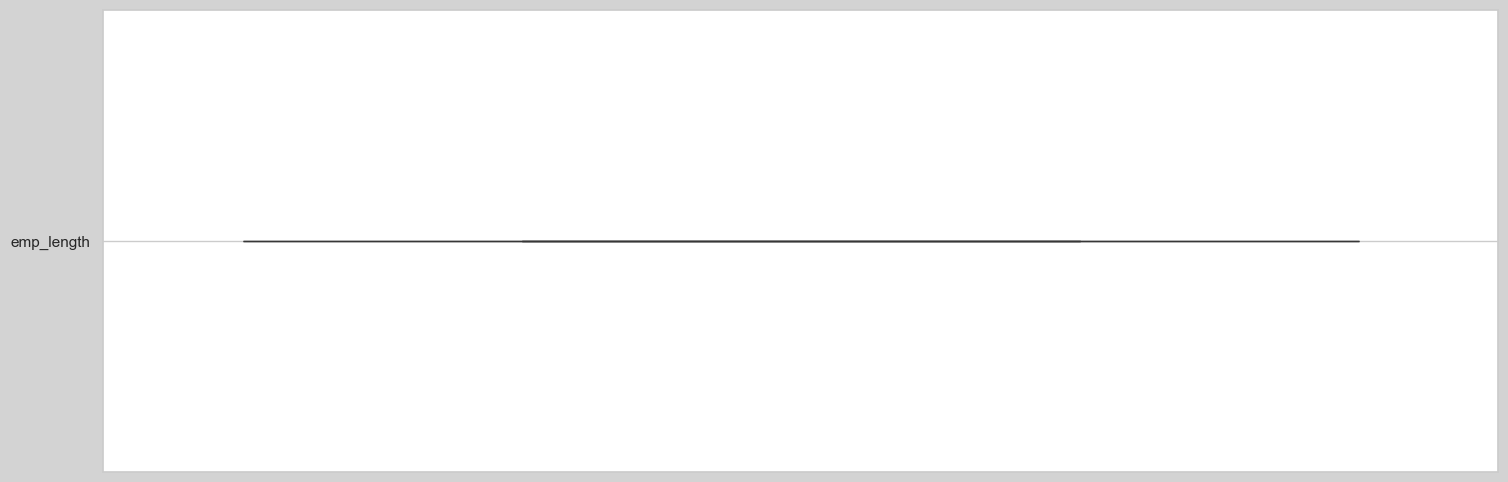

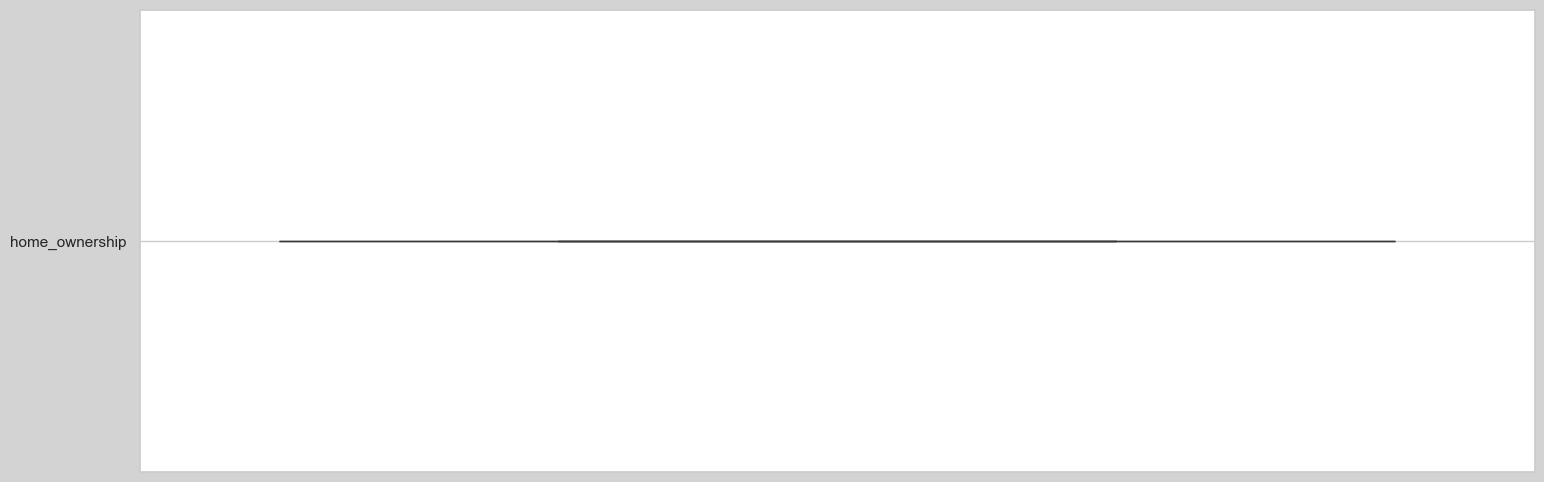

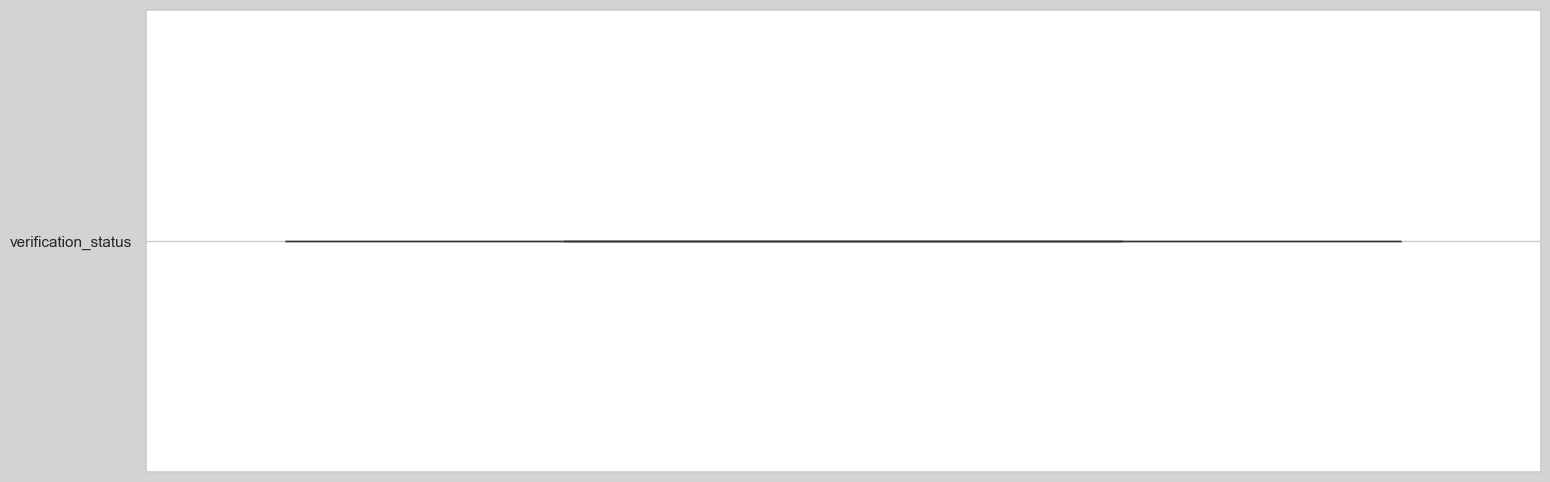

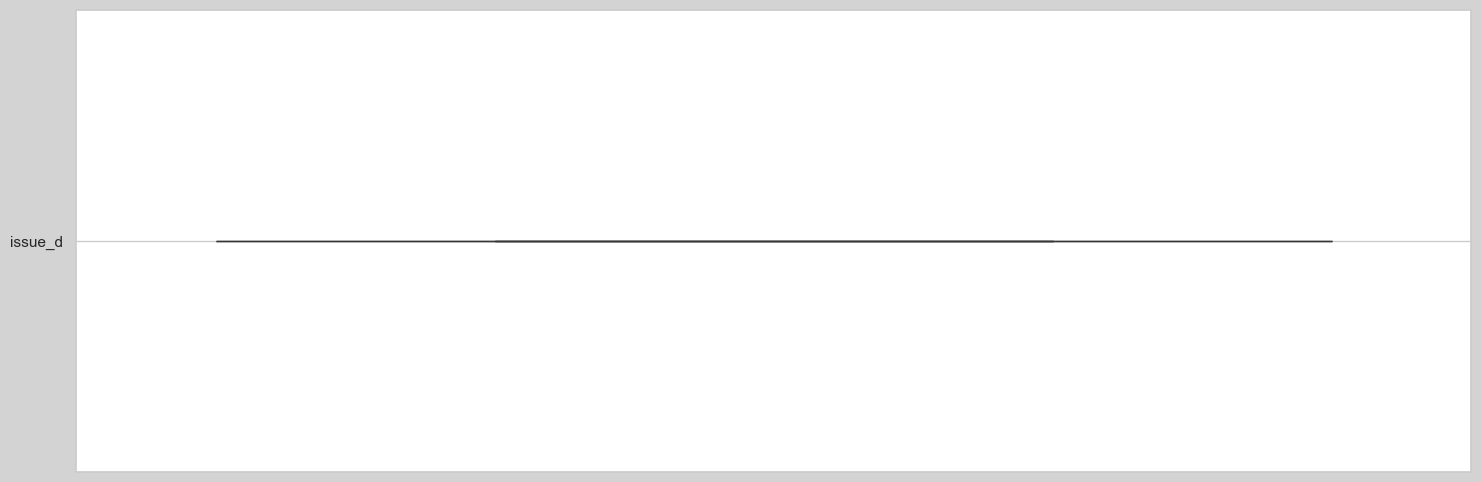

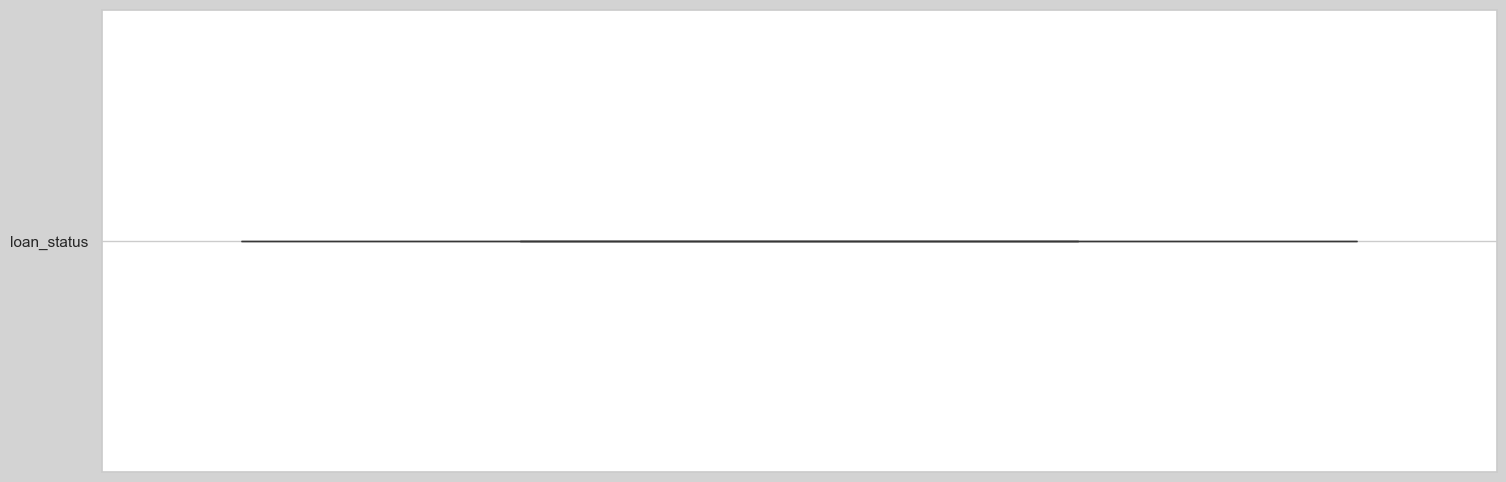

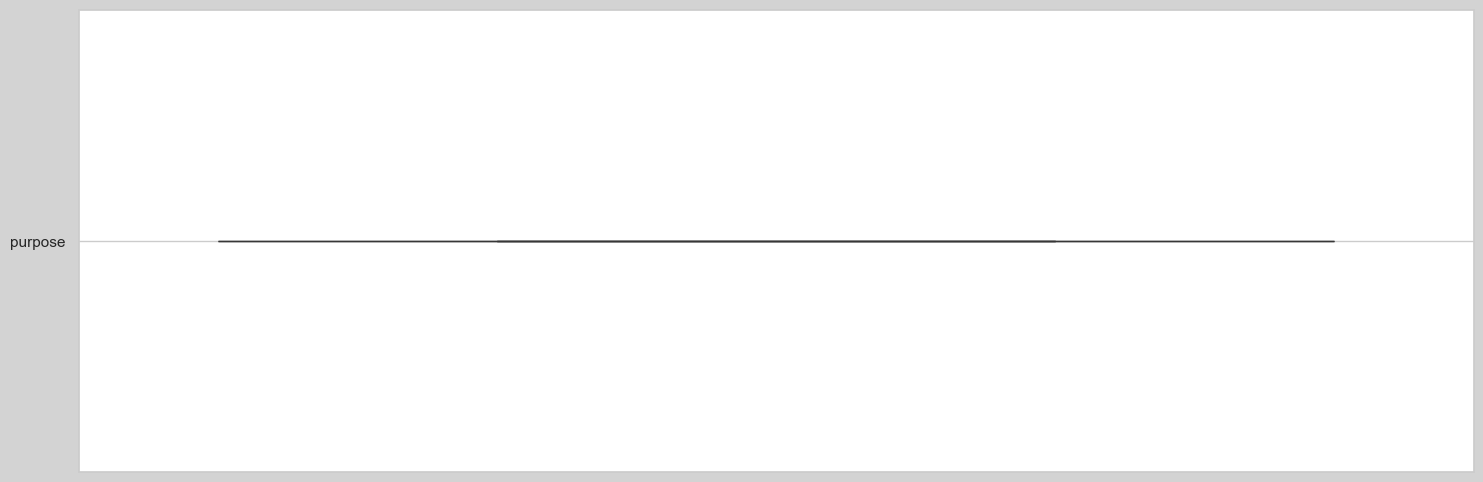

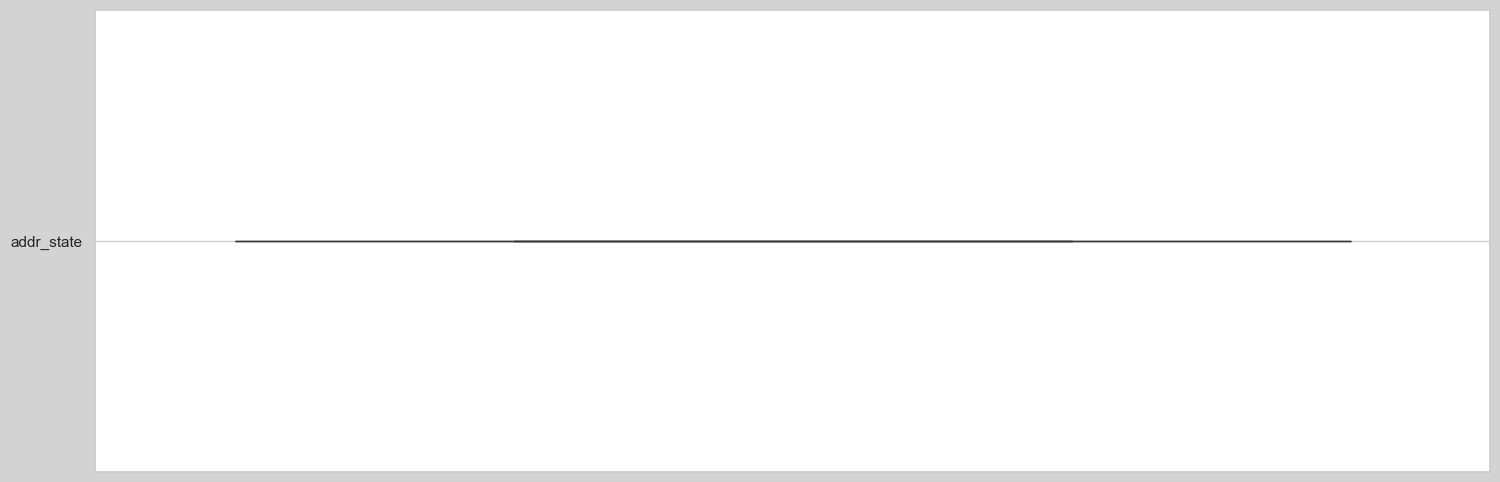

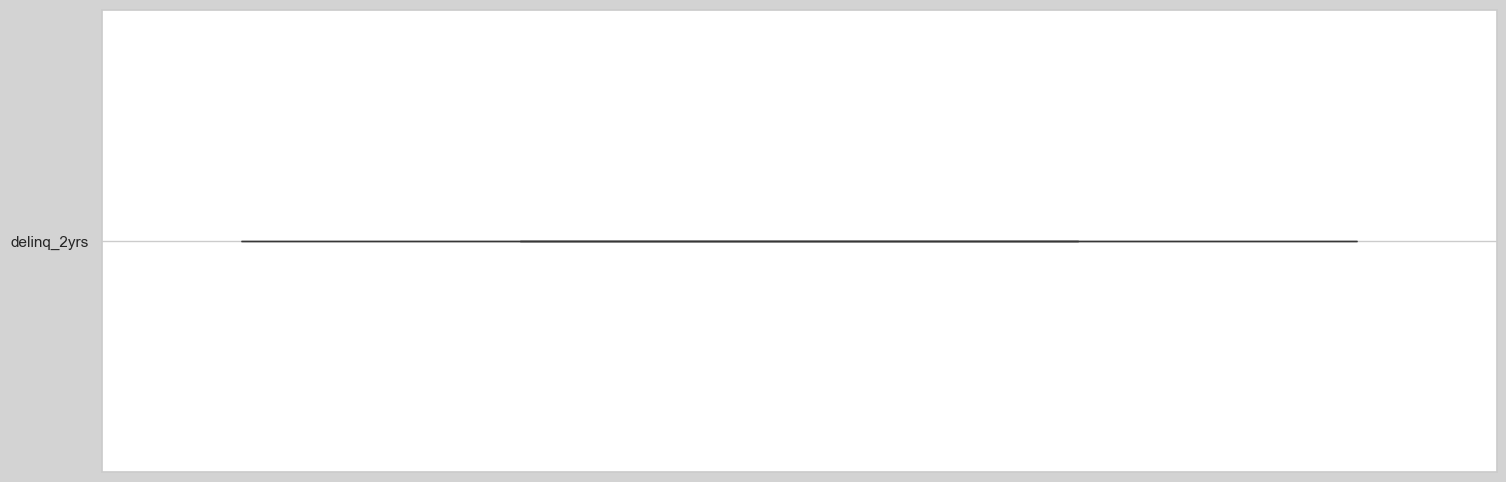

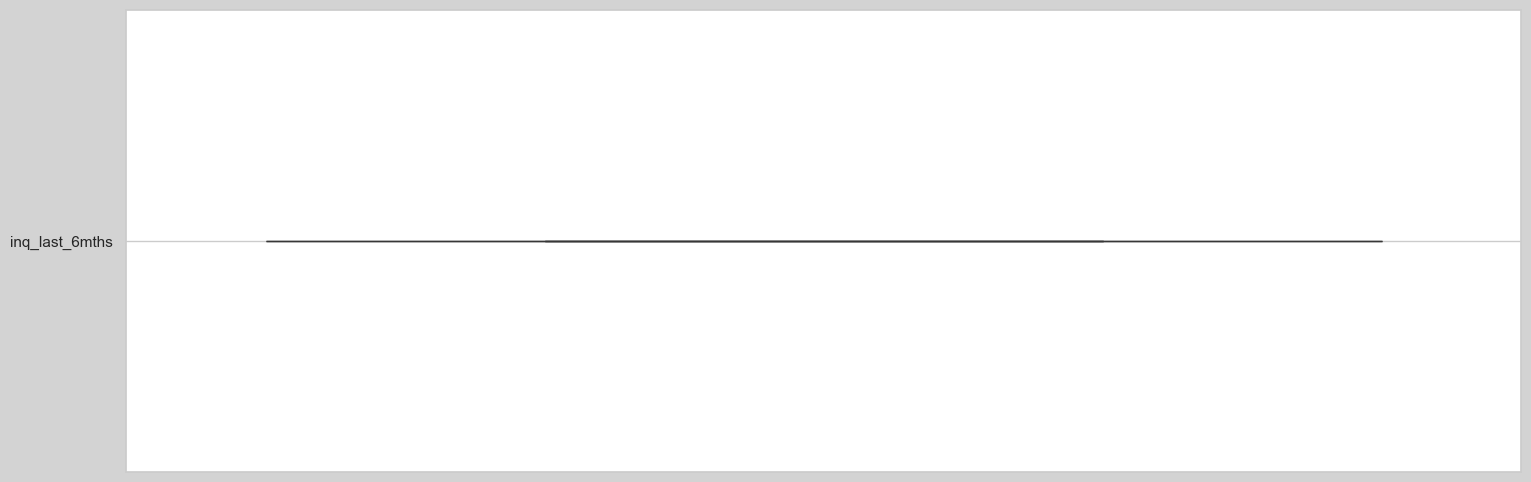

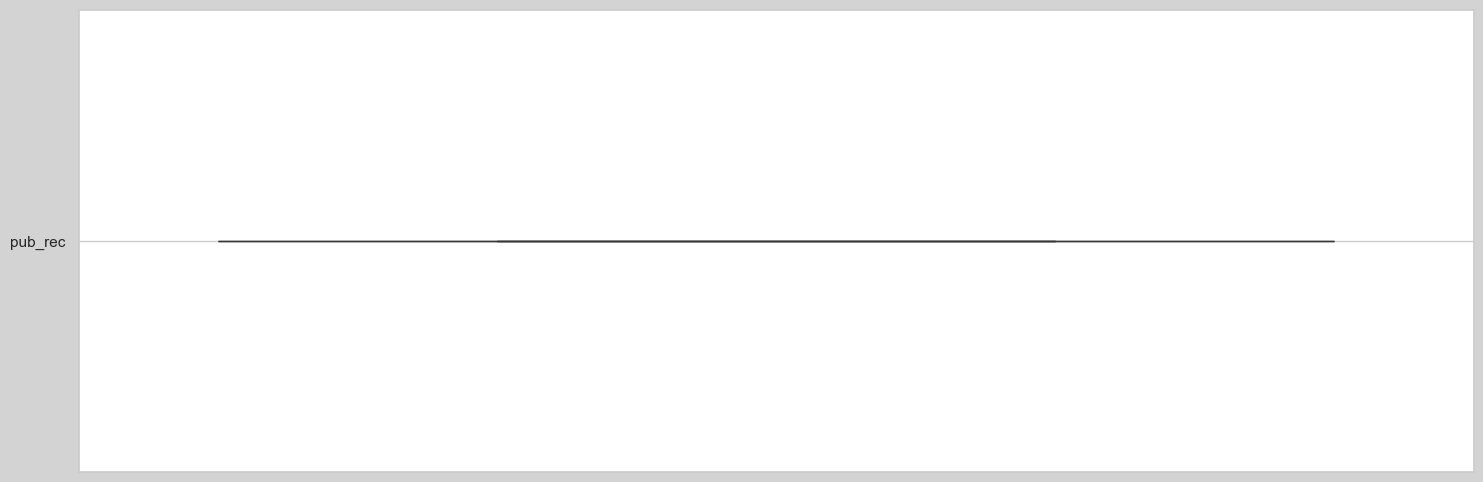

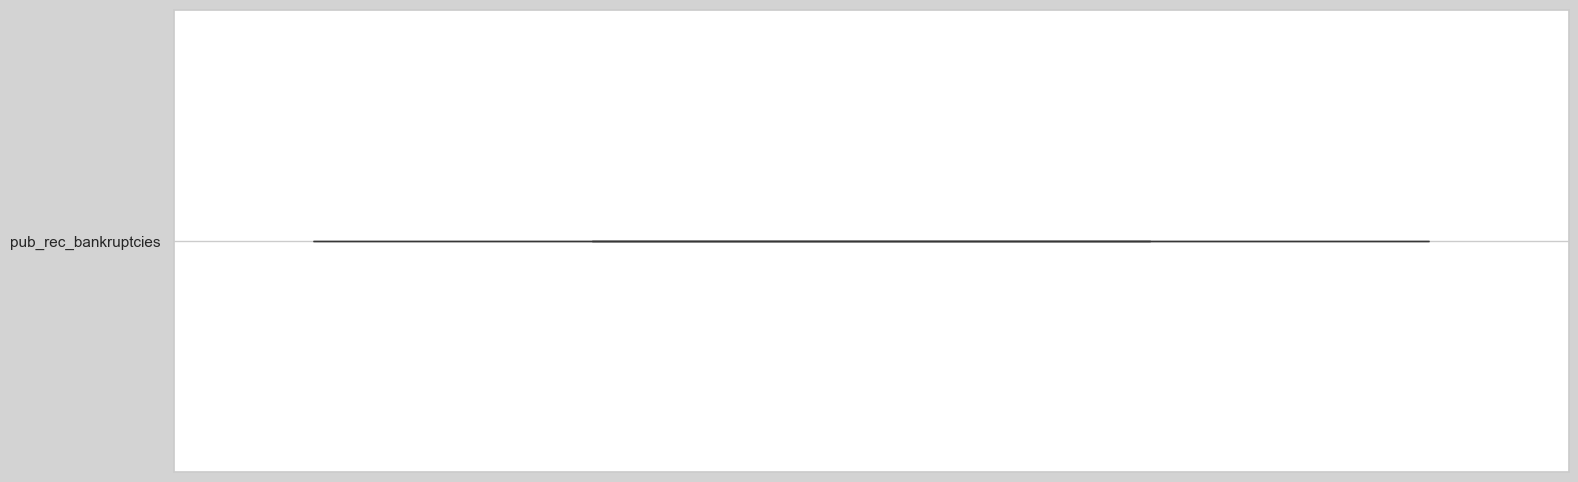

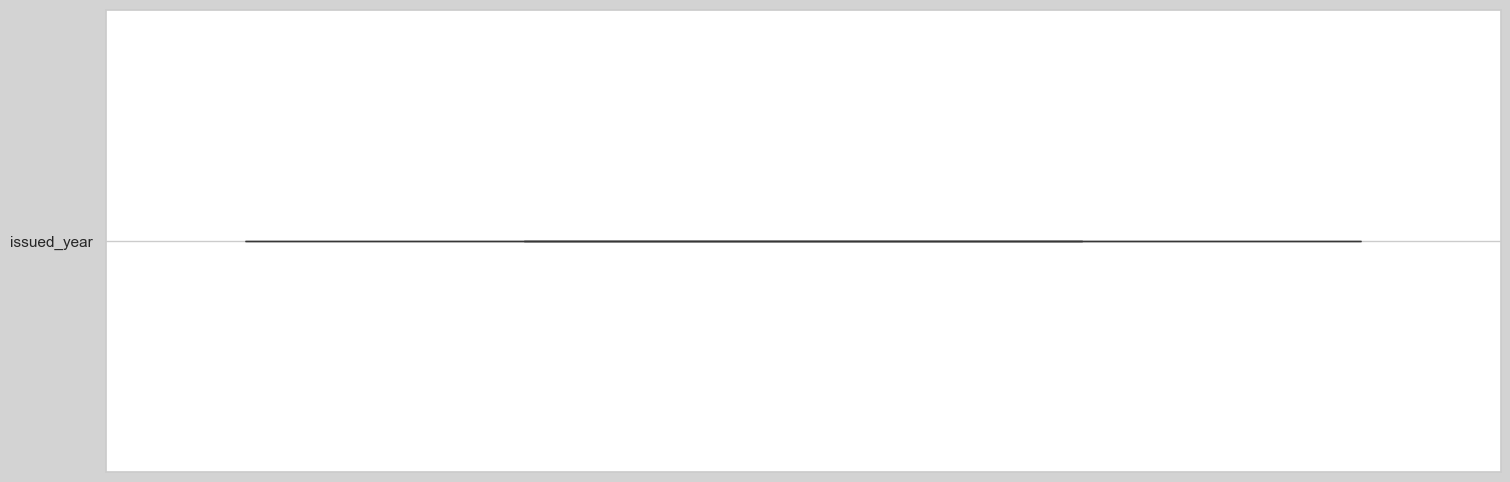

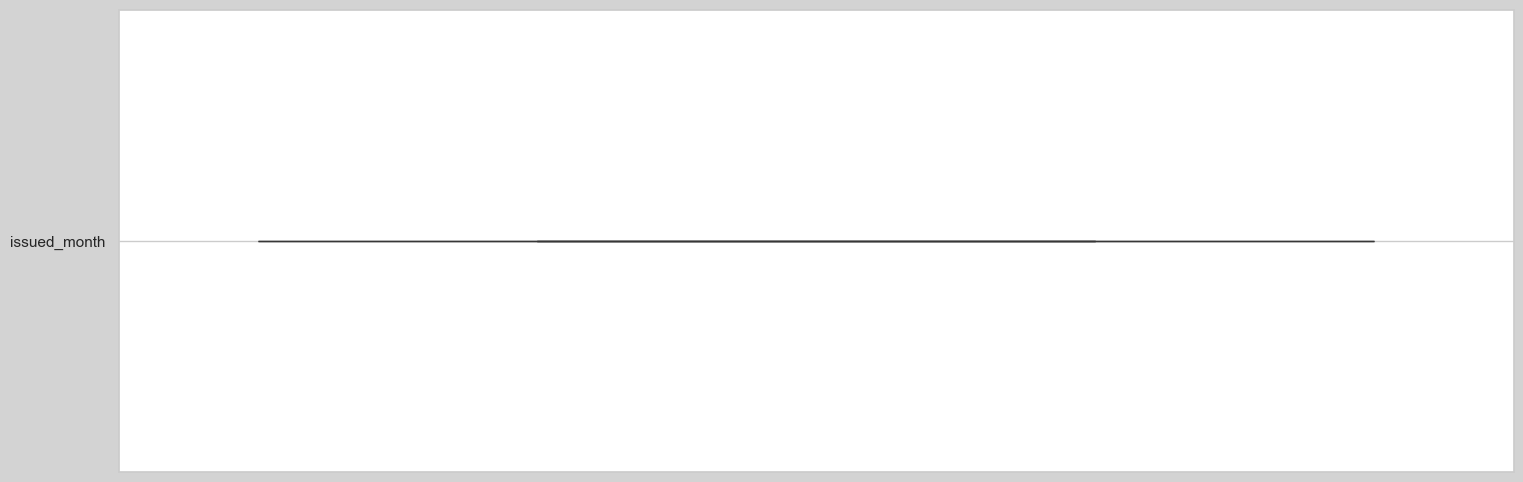

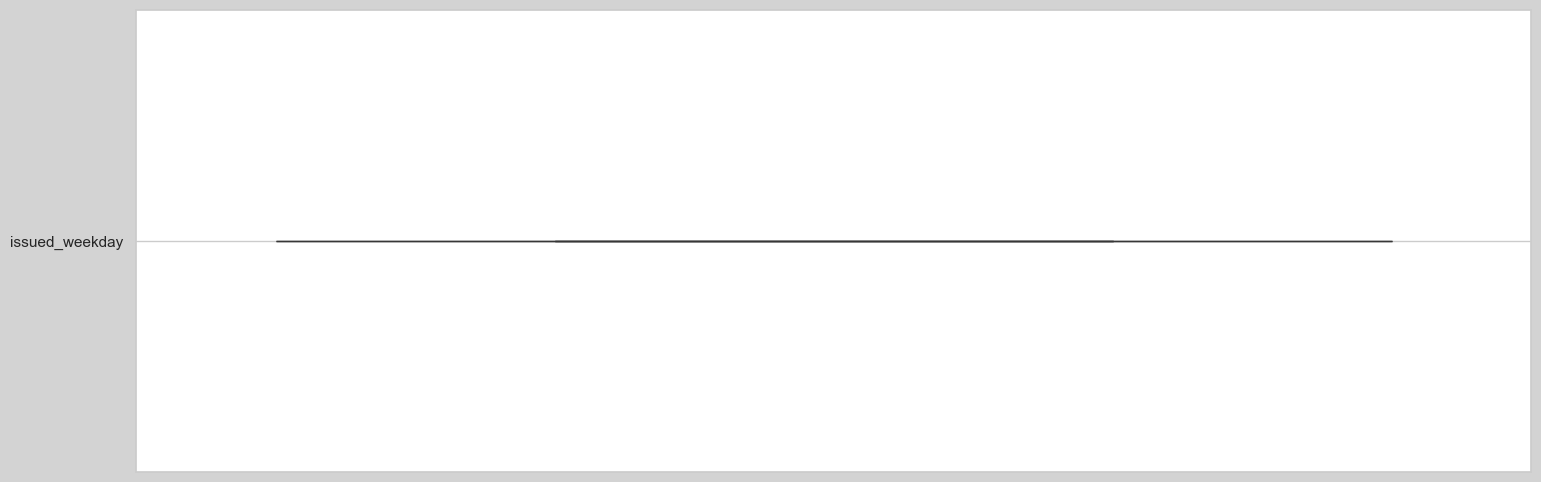

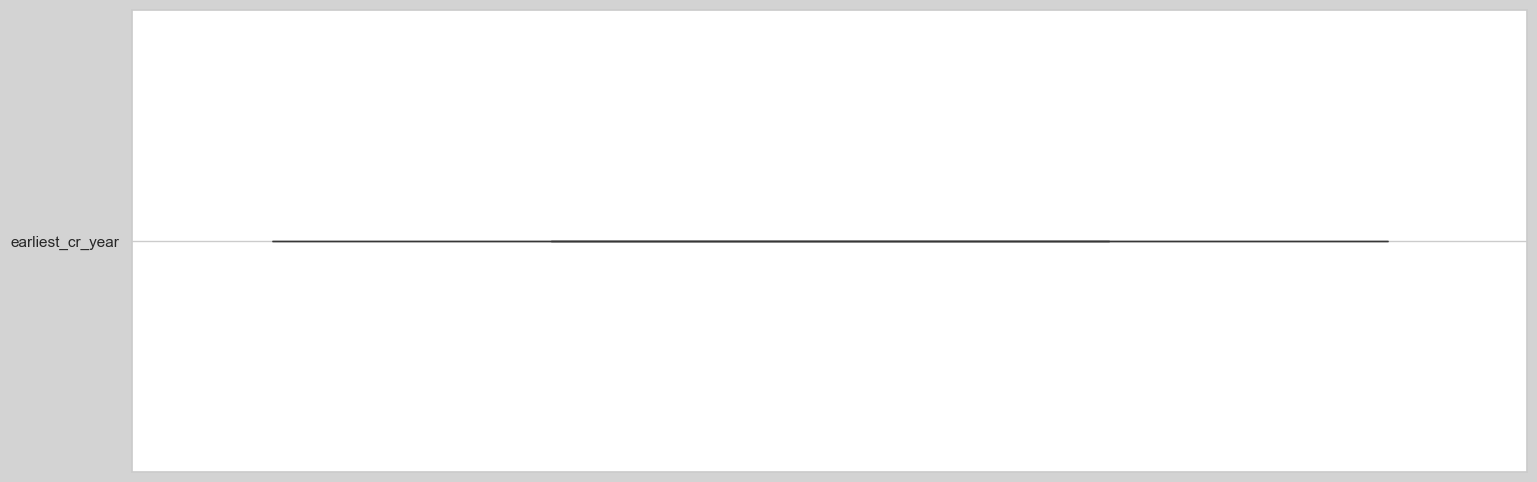

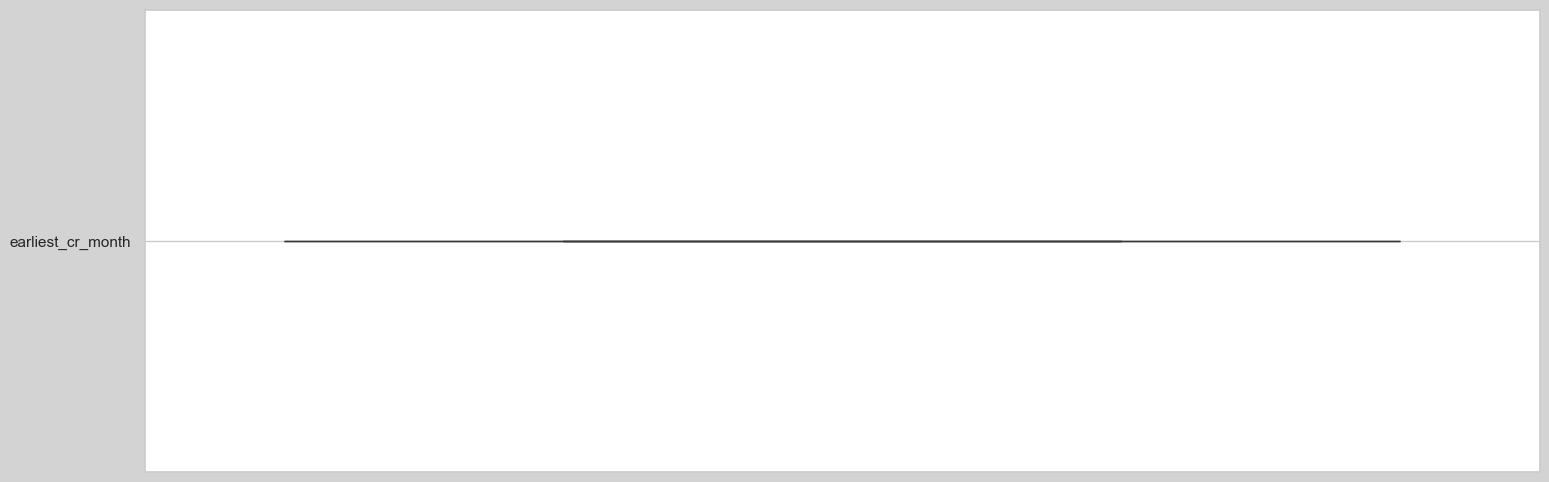

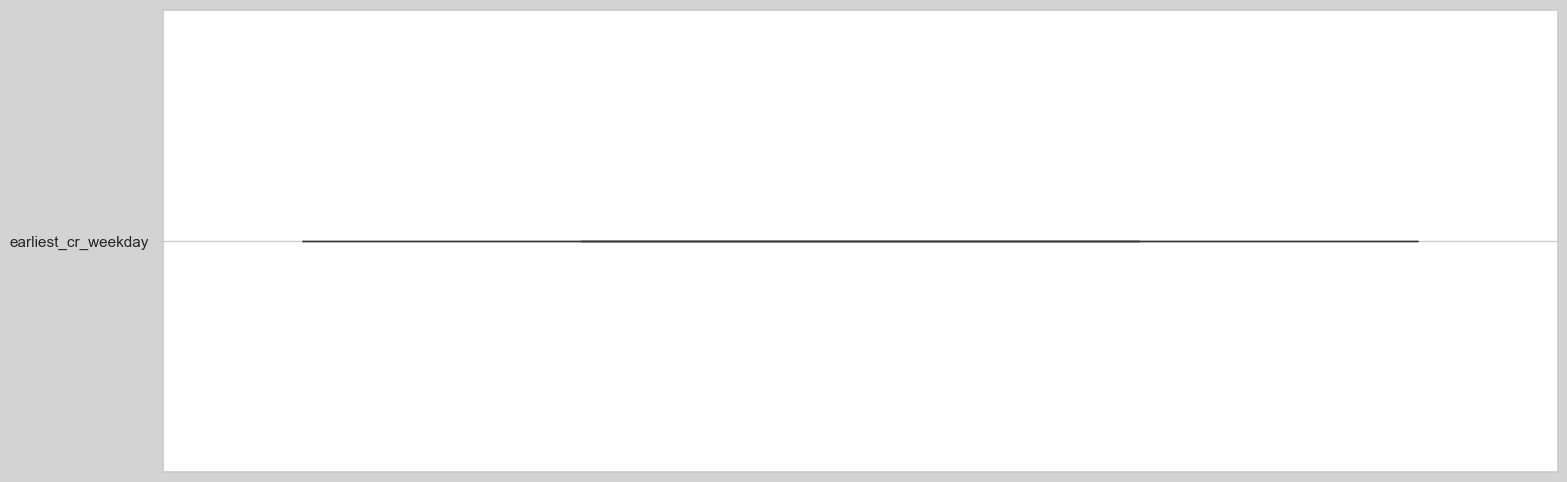

In [410]:

for col in cat_cols:
    plt.figure(figsize=(18, 6), facecolor='lightgray')
    sns.set(style="whitegrid")
    #sns.countplot(x=col,data = df,hue='loan_status',palette='Dark2')
    #sns.countplot(x=col,data = df,palette='Dark2')
    sns.boxplot(col,palette='Dark2')
    plt.show()

##### Inferences from above graphs:

1. The loans for the period of 36 months are more likely to default.
2. Grade ‘B’ and 'C' are more prone to default.
3. The top 5 bars of defaulters are for Subgrades 'B5','B3','B4','C1'and 'C2'. Hence, making point 2 more strong.
4. emp_length of 10+ years are far more defaulters compared to others.
5. defaulters with ‘rented’ homes are more than 'mortgaged' house. ‘Own’ homes are comparatively very less
6. verified loans are more defaulters than source verified. Not verified loans are also close behind to default.
7. There has been somewhat linear growth in loan sanctions for Jun-07 to Dec-11
9. Max no. of defaulters are for ‘debt consolidation’
10. Max no. of defaulters are in CA (California)
11. Almost all the defaulters have ‘delinq_2yrs’ as 0
12. Majority of the defaulters have 0 inquiries in last 6 months
13. Almost all of the defaulters have 0 pub_rec
14. Almost all of the defaulters have 0 pub_rec_bankruptcies

#### Numerical

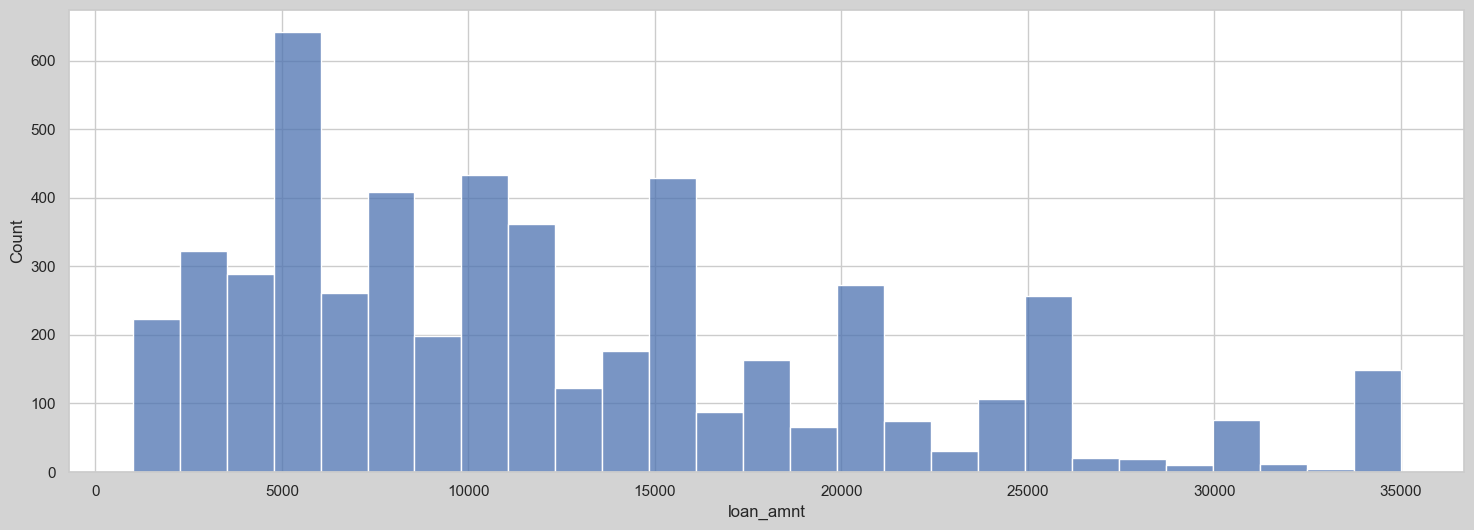

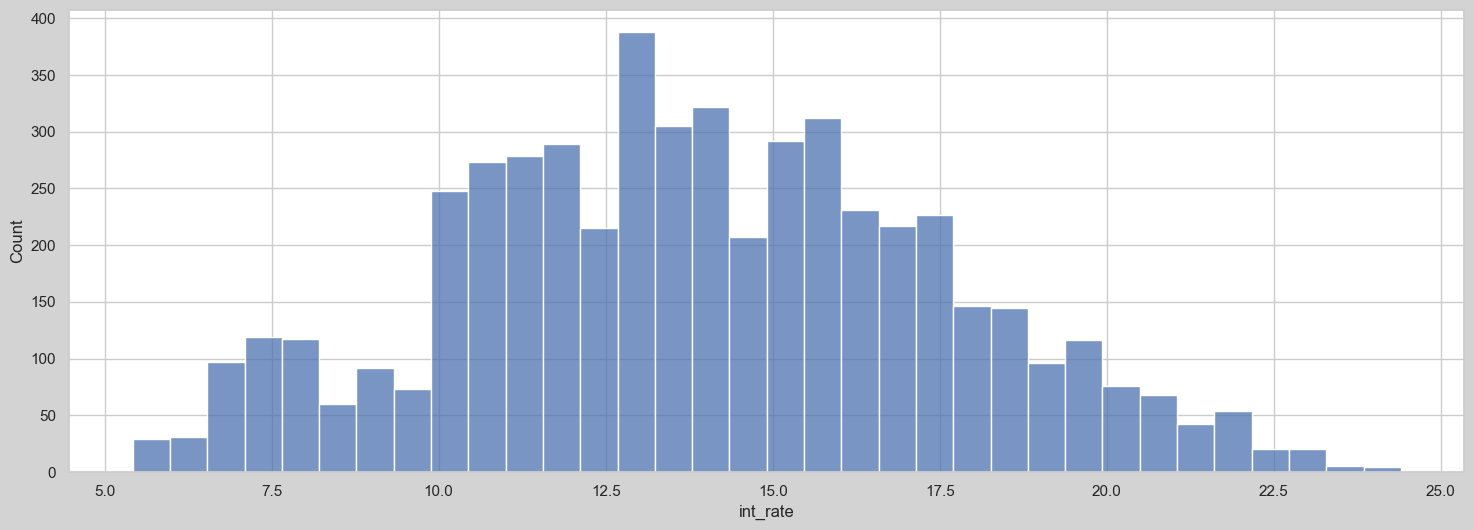

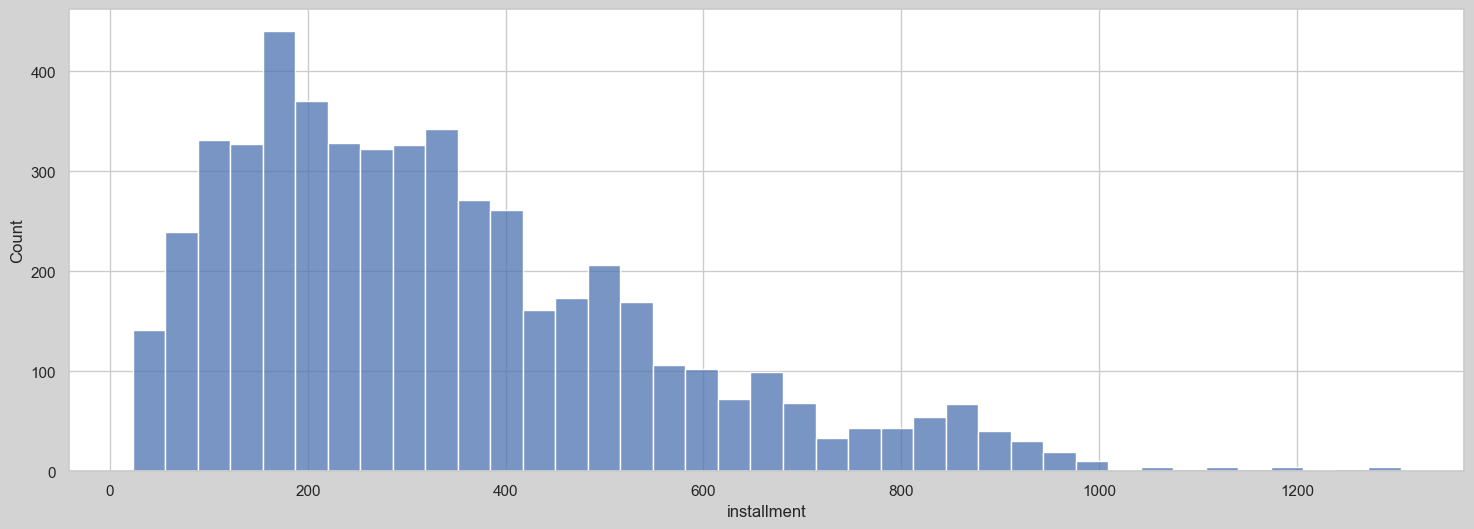

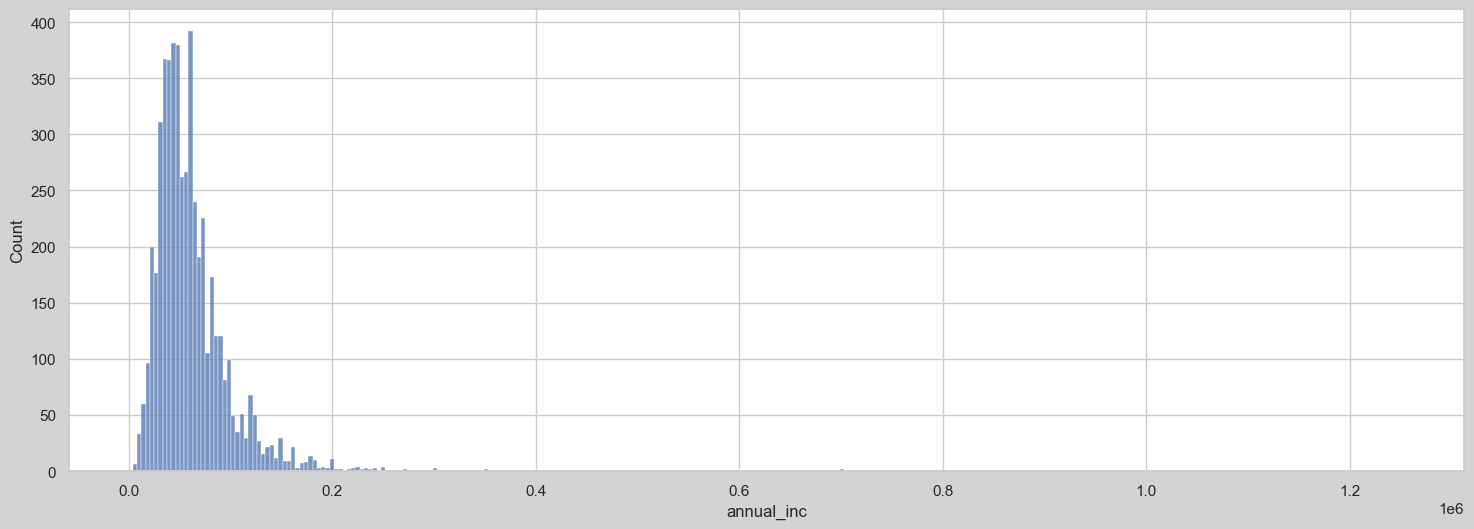

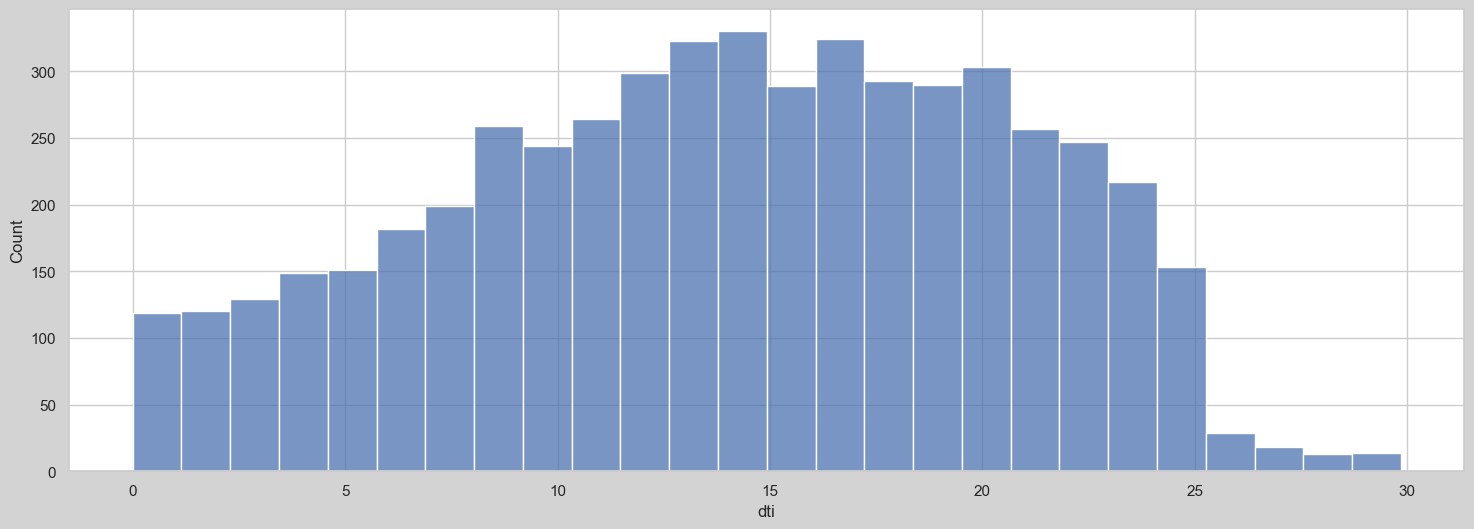

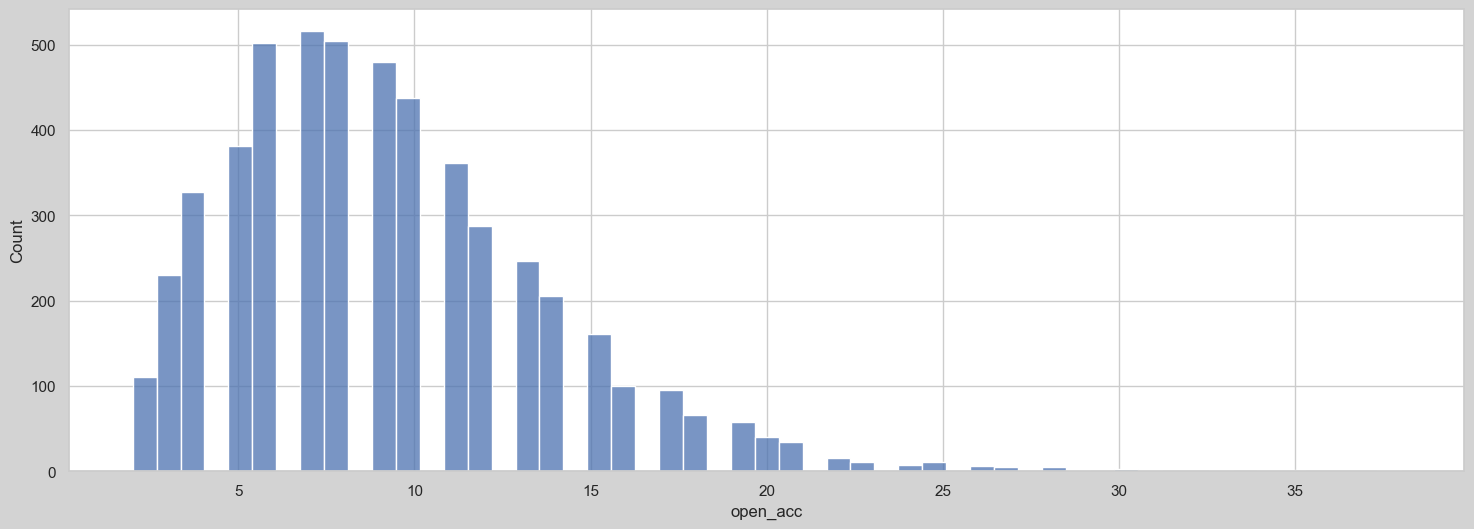

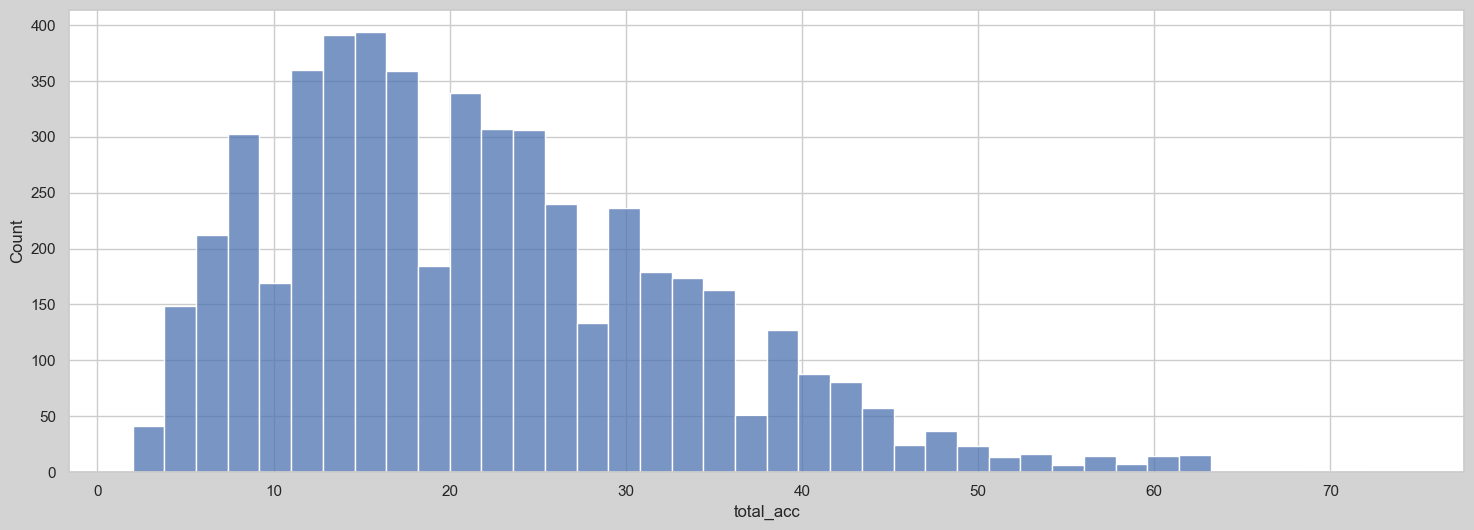

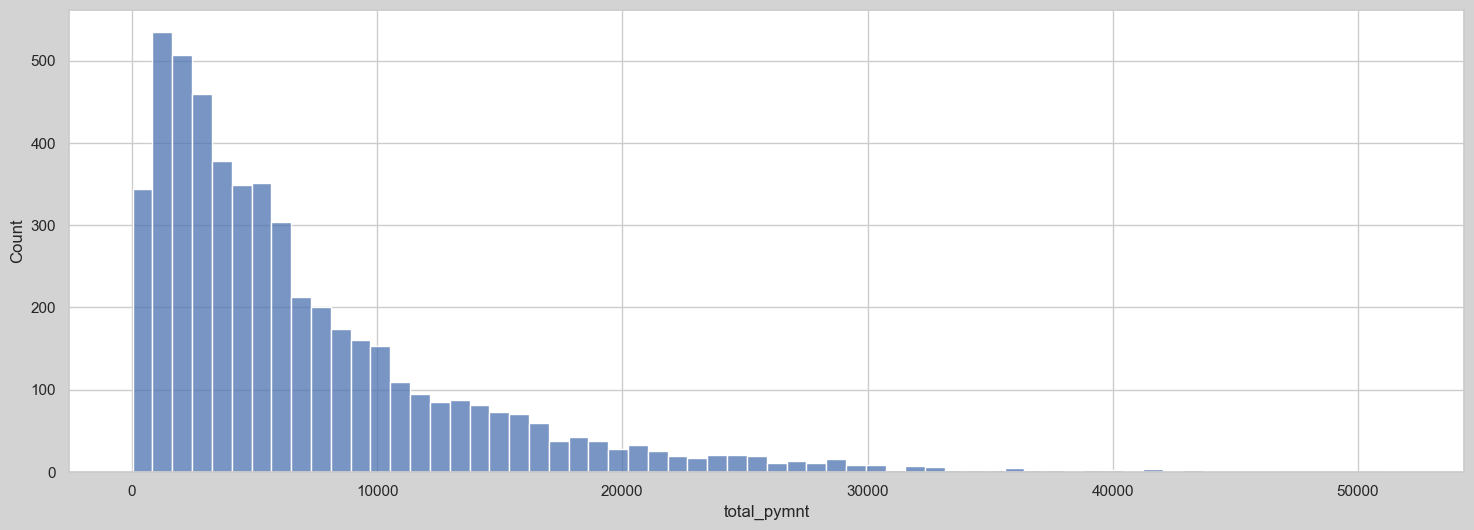

In [203]:
for col in num_cols:
    plt.figure(figsize=(18, 6), facecolor='lightgray')
    sns.set(style="whitegrid")
    sns.histplot(x=col,data = df_defaulters, palette='Dark2')
    plt.show()

#### Inferences from above graphs:

1. Majority of the defaulters are for a loan amount of 5000-6500
2. Majority of the defaulters are for int_rate between 12.8 - 13.8
3. Max no.of installments of defaulters lie in the range of 155-170
4. Max no.of defaulters are for dti in the range of 12-15 and around 16
5. Max no. of defaulters are for borrowers having 6-8 open_acc
6. Max defaulters are for borrowers having total_acc around 14-17
7. Max defaulters have total_payment of around 1650-4100

## Bivariate Analysis

### Categorical against LoanStatus

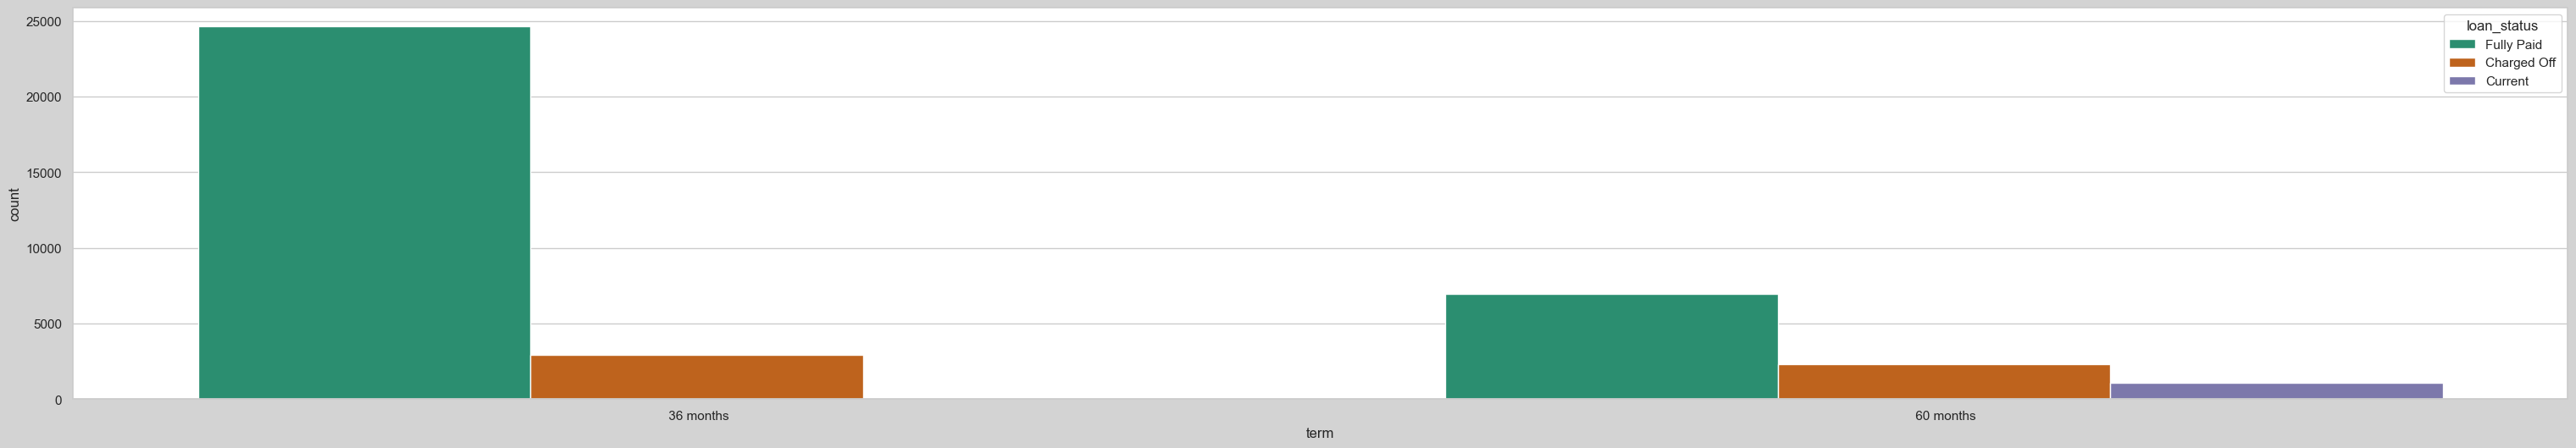

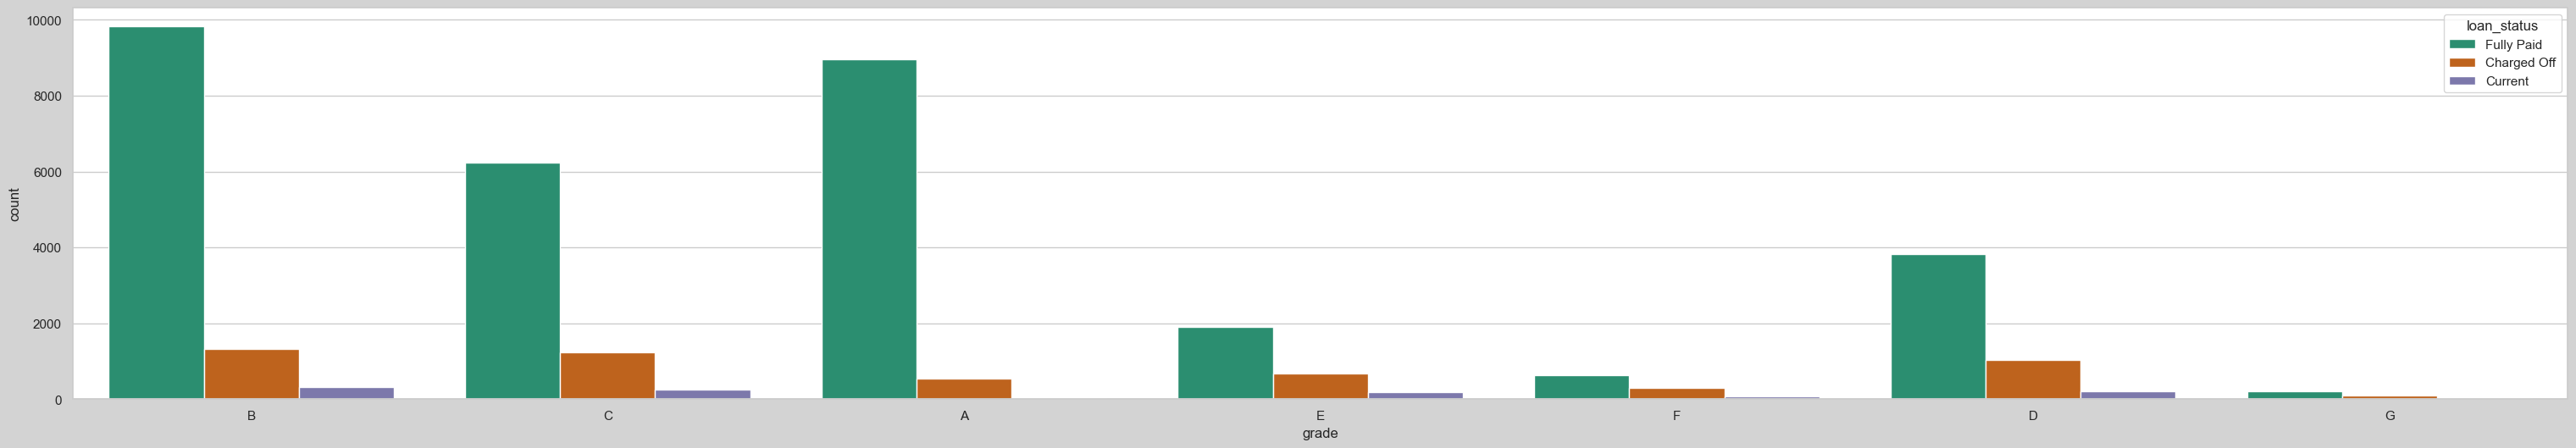

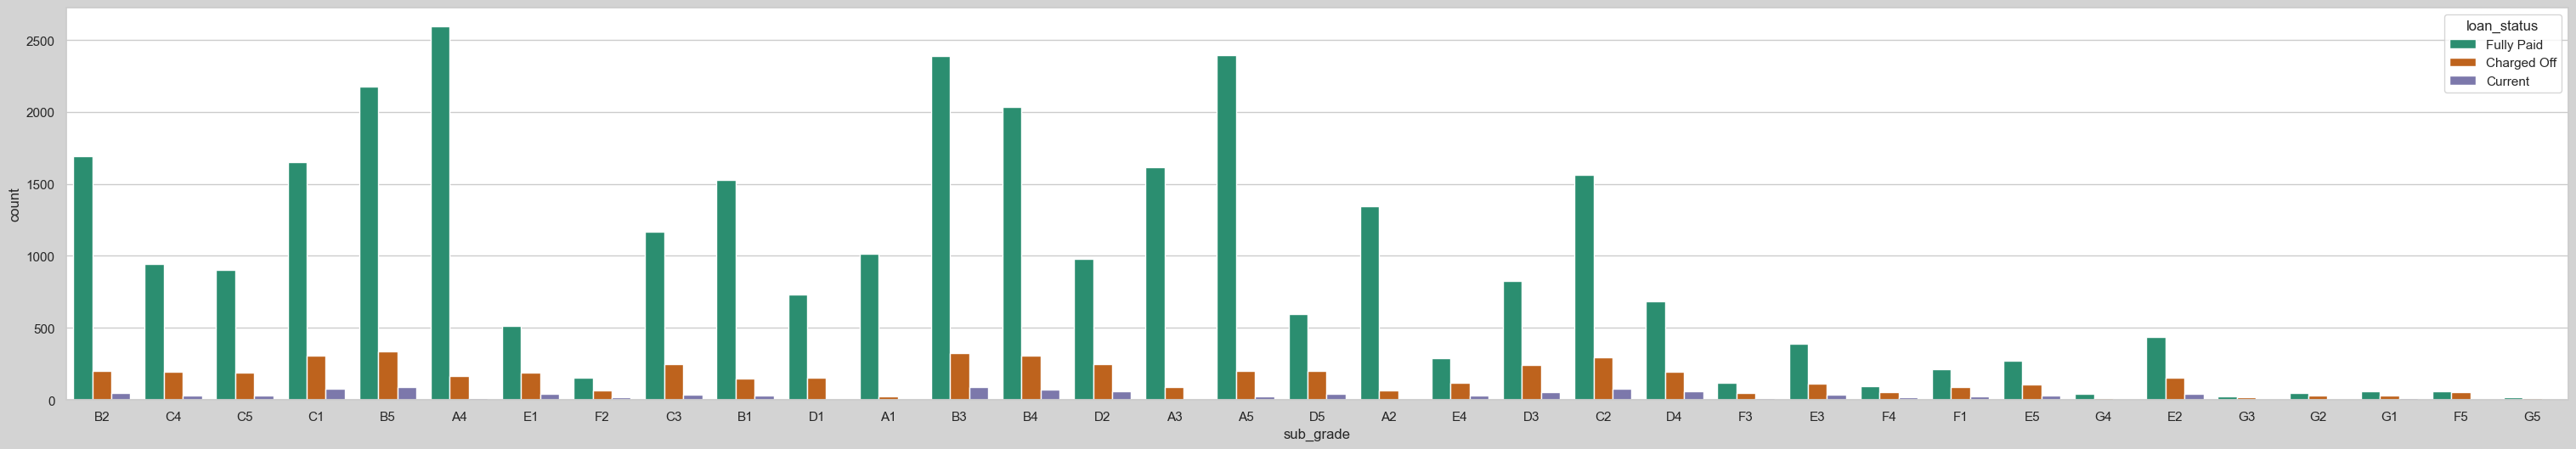

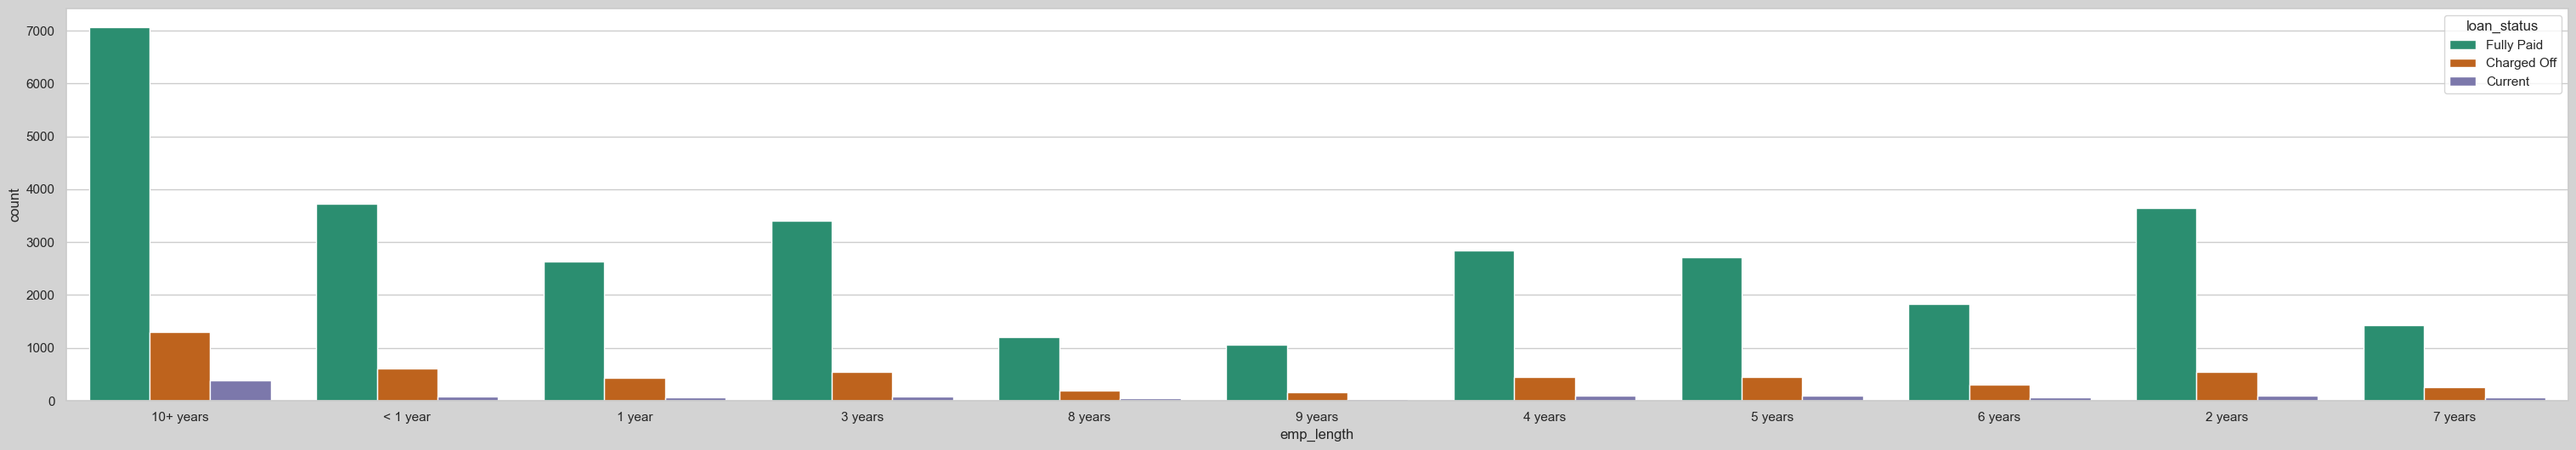

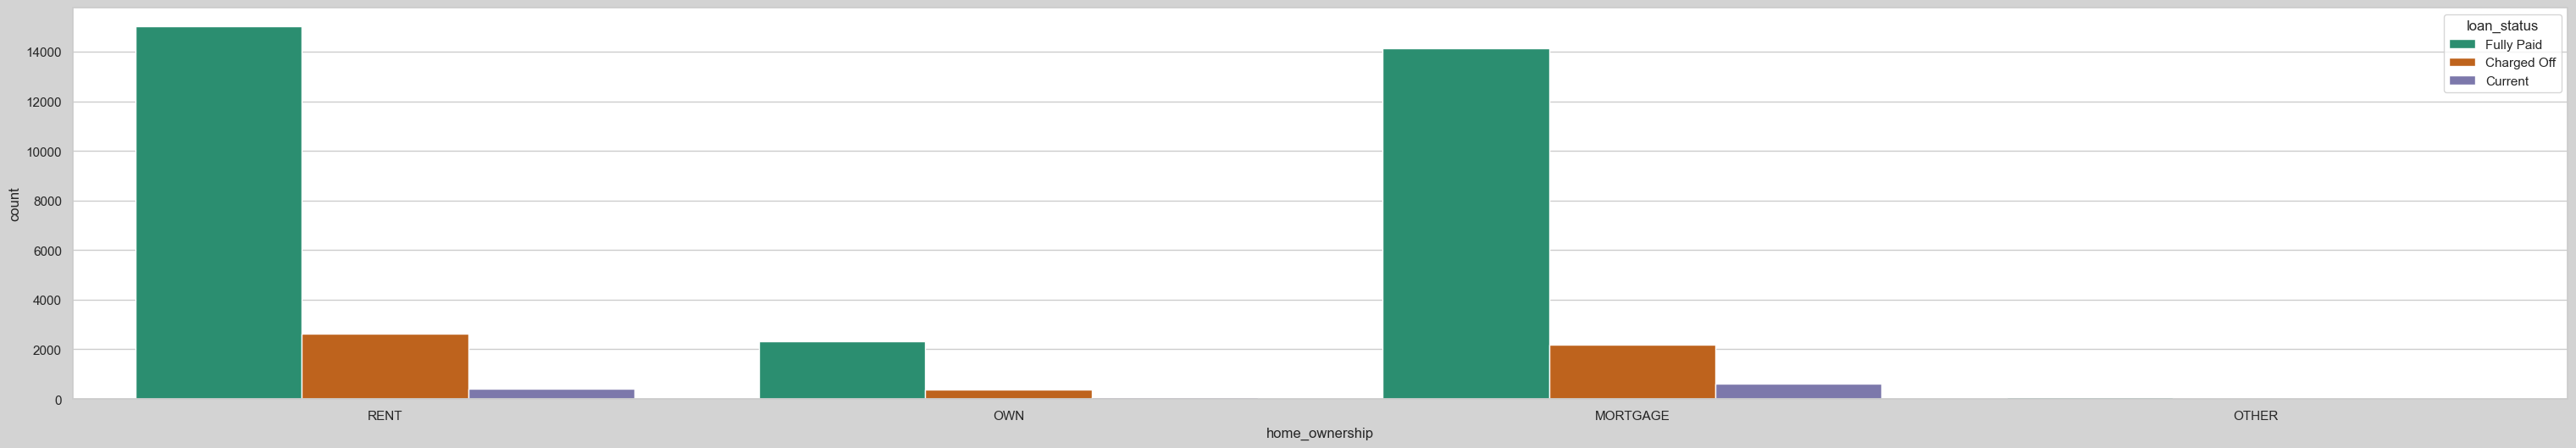

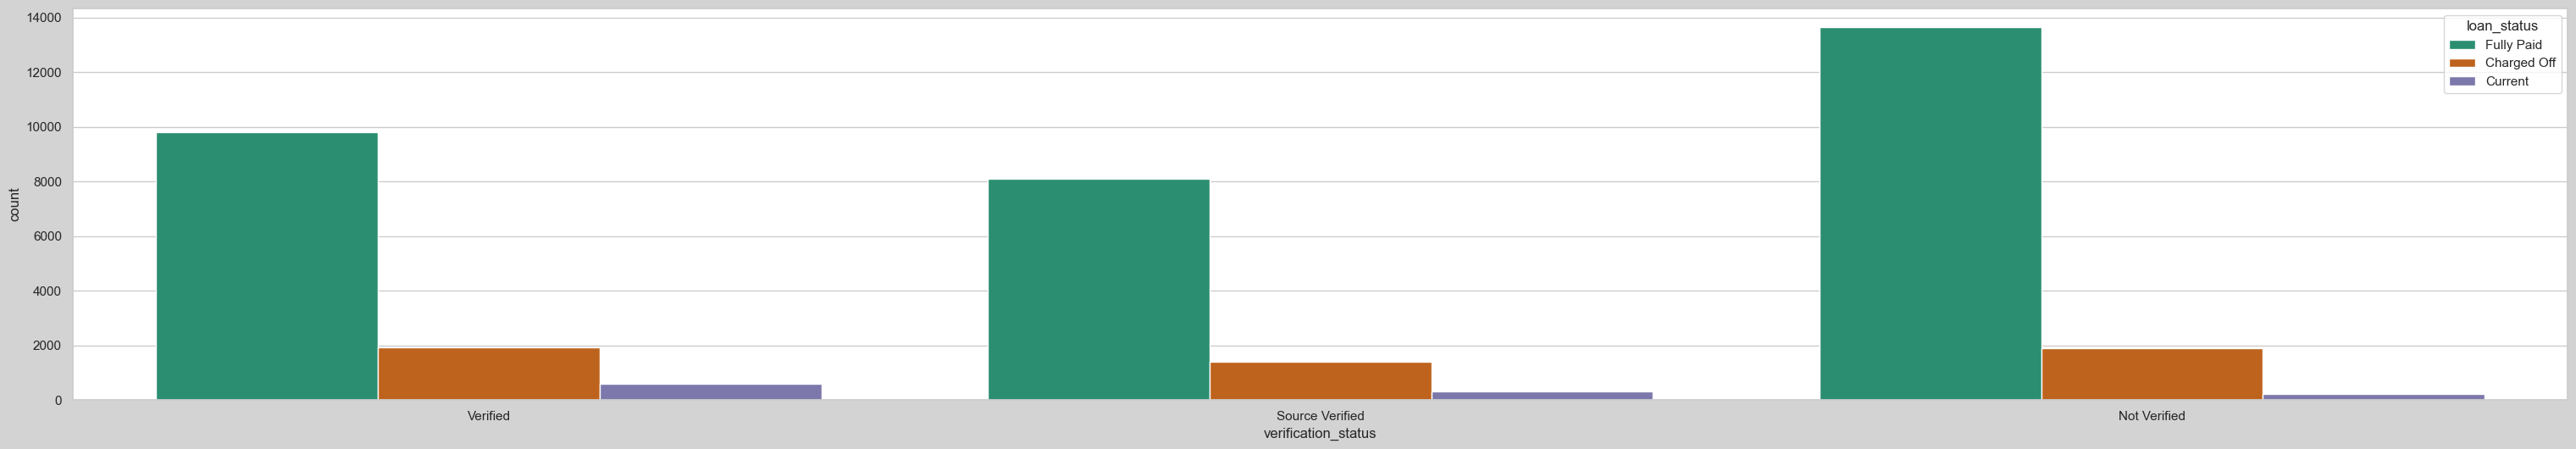

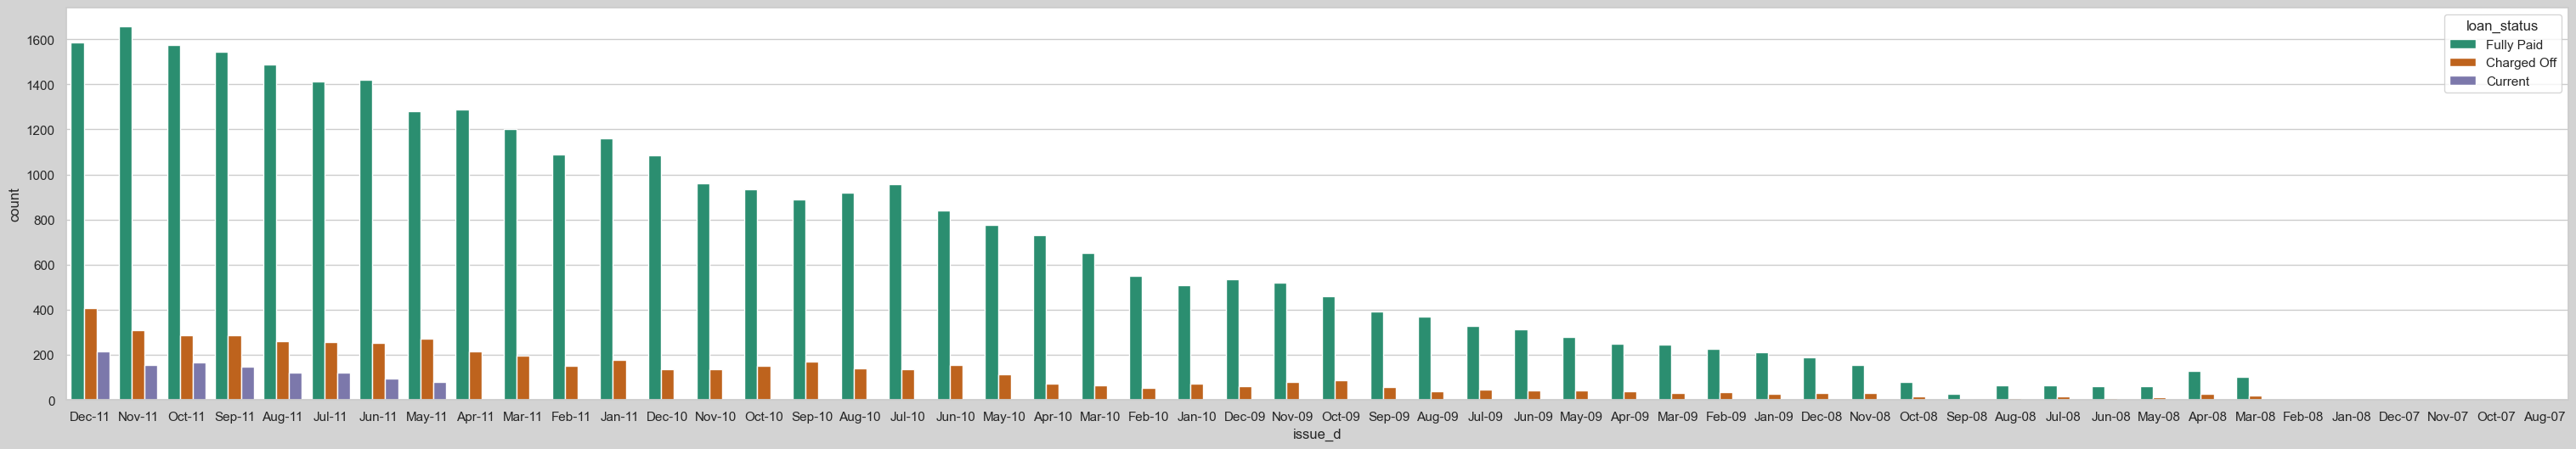

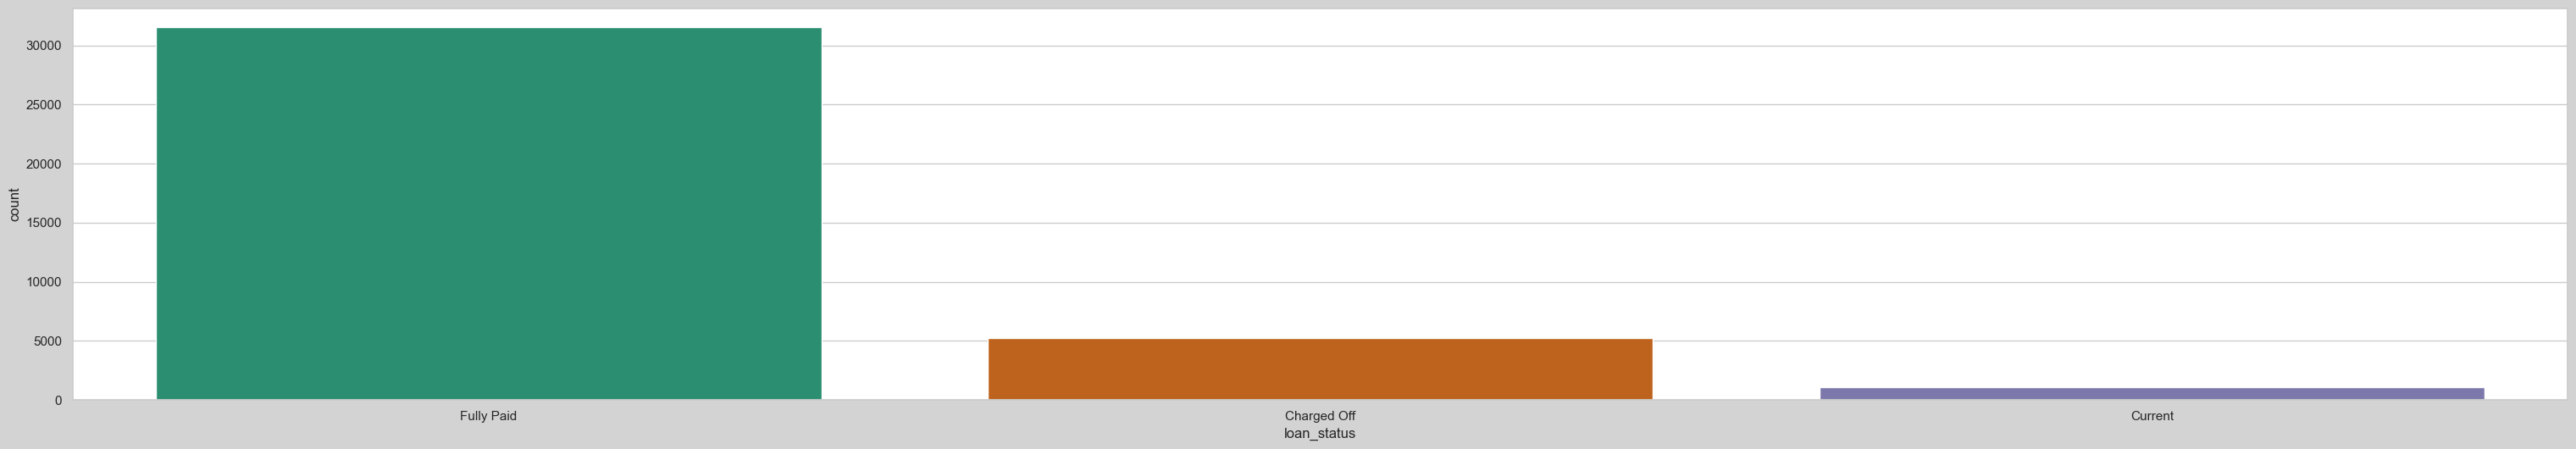

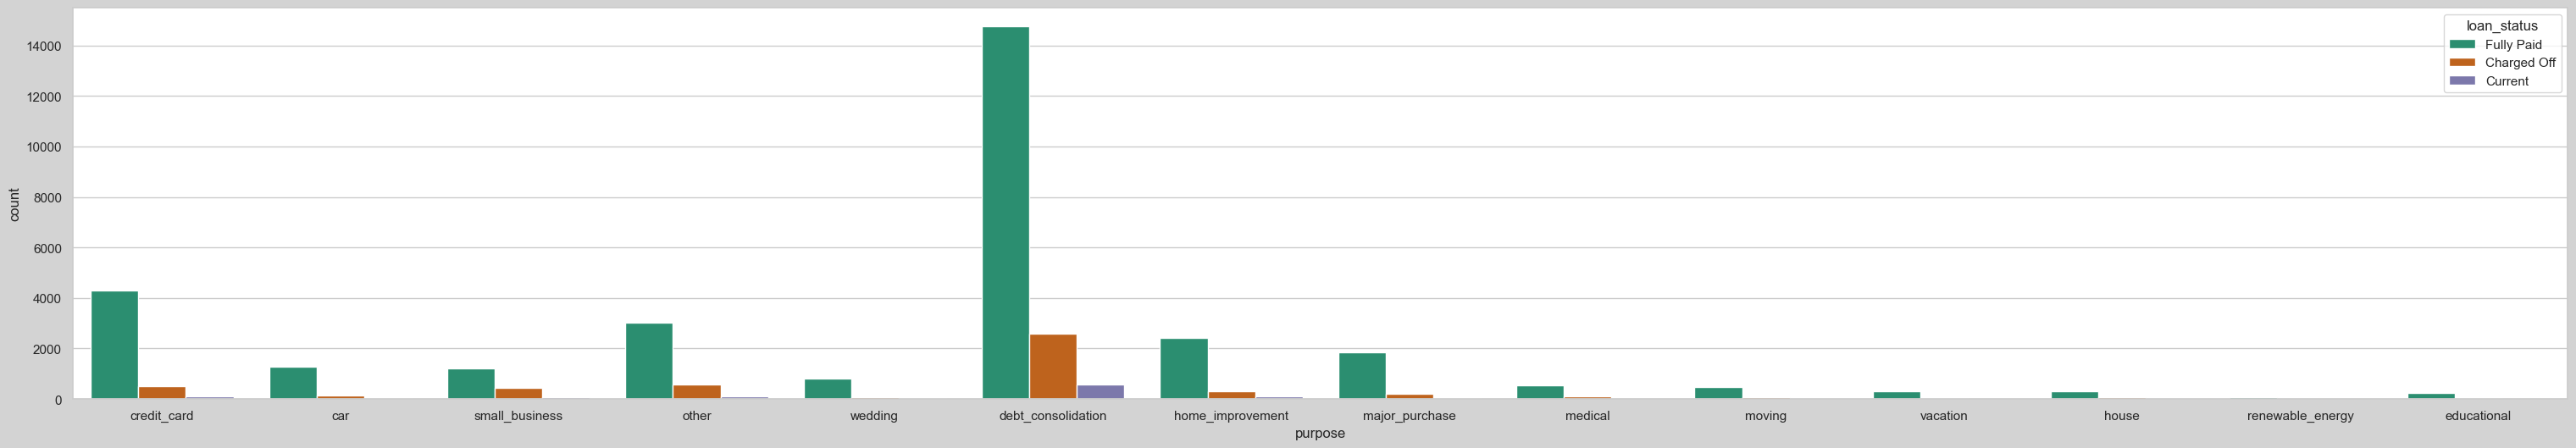

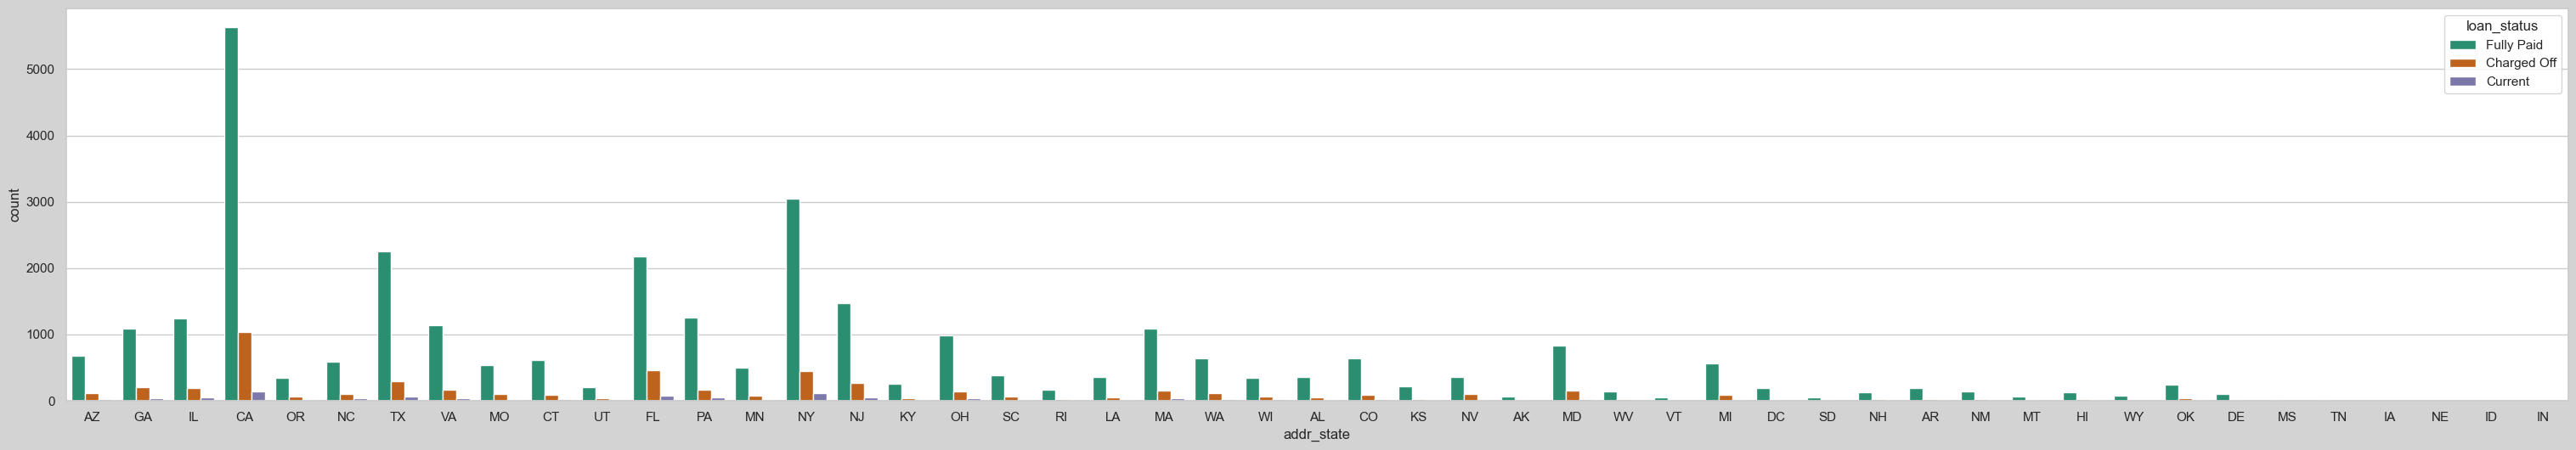

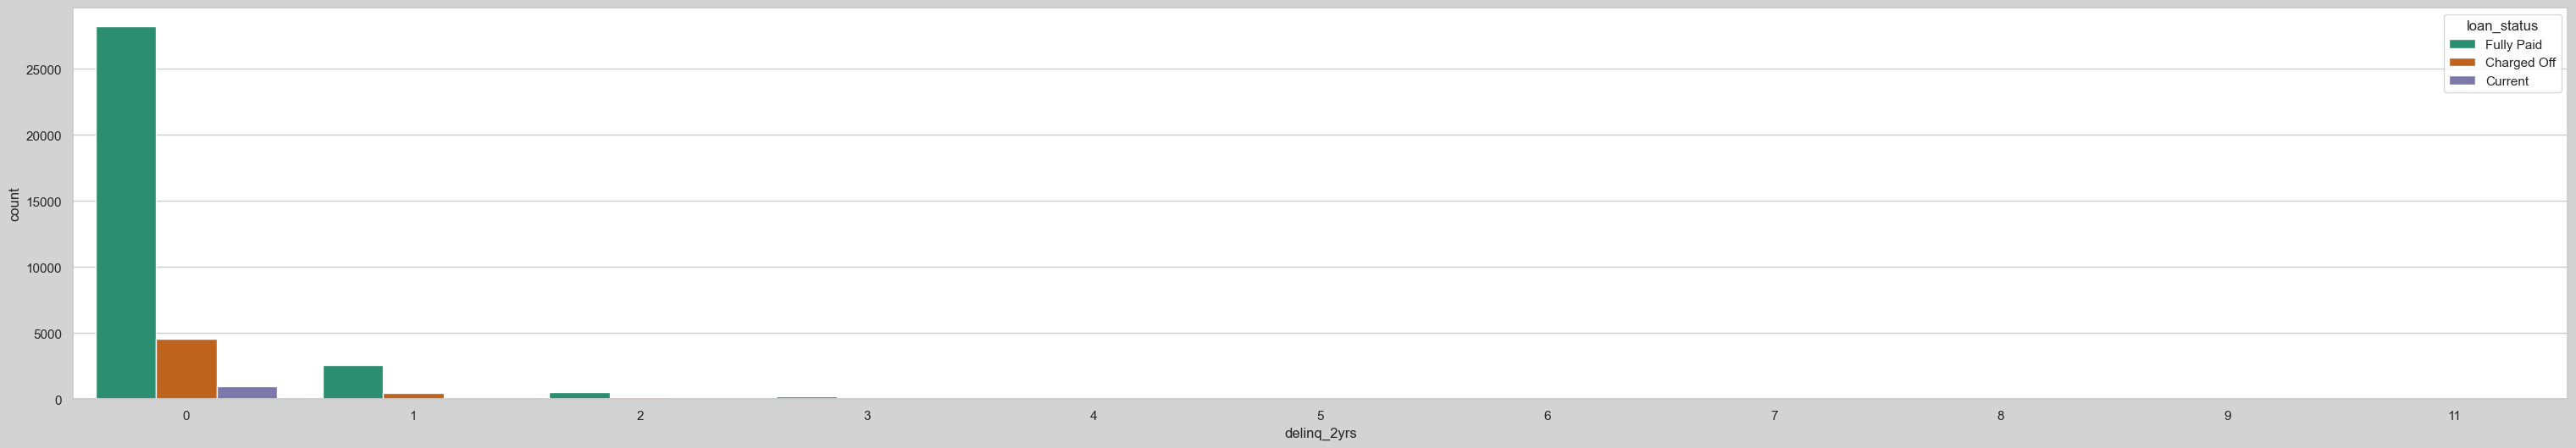

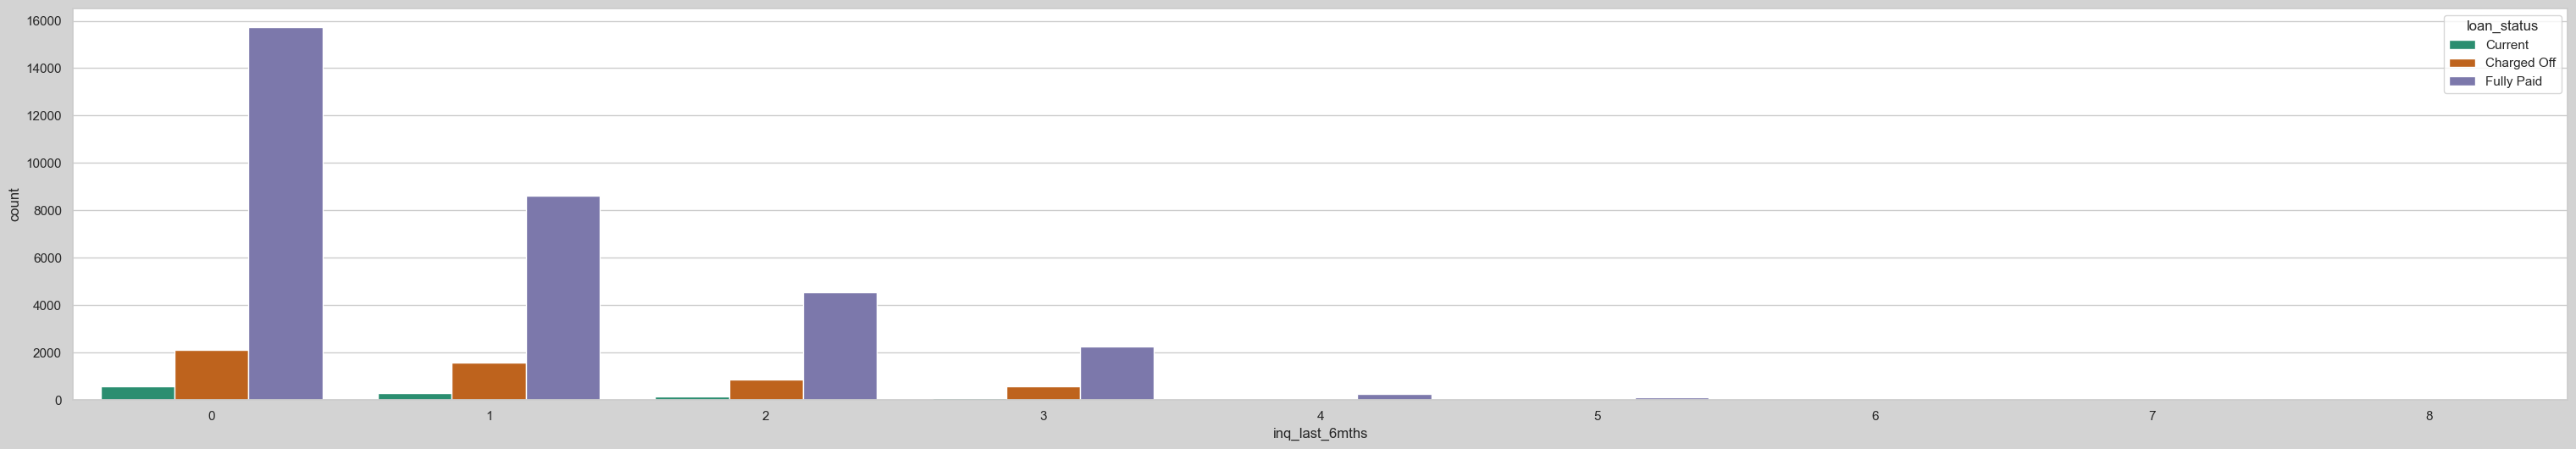

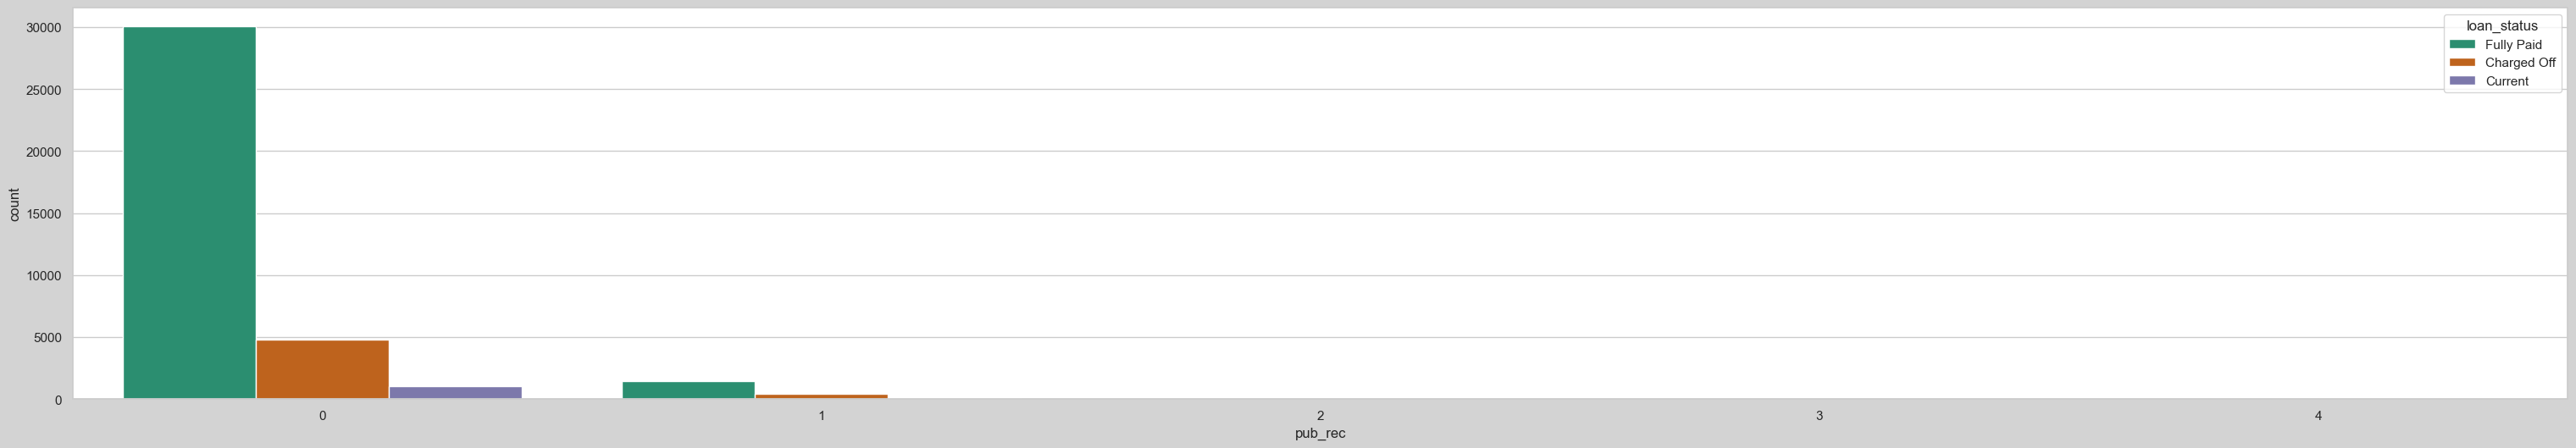

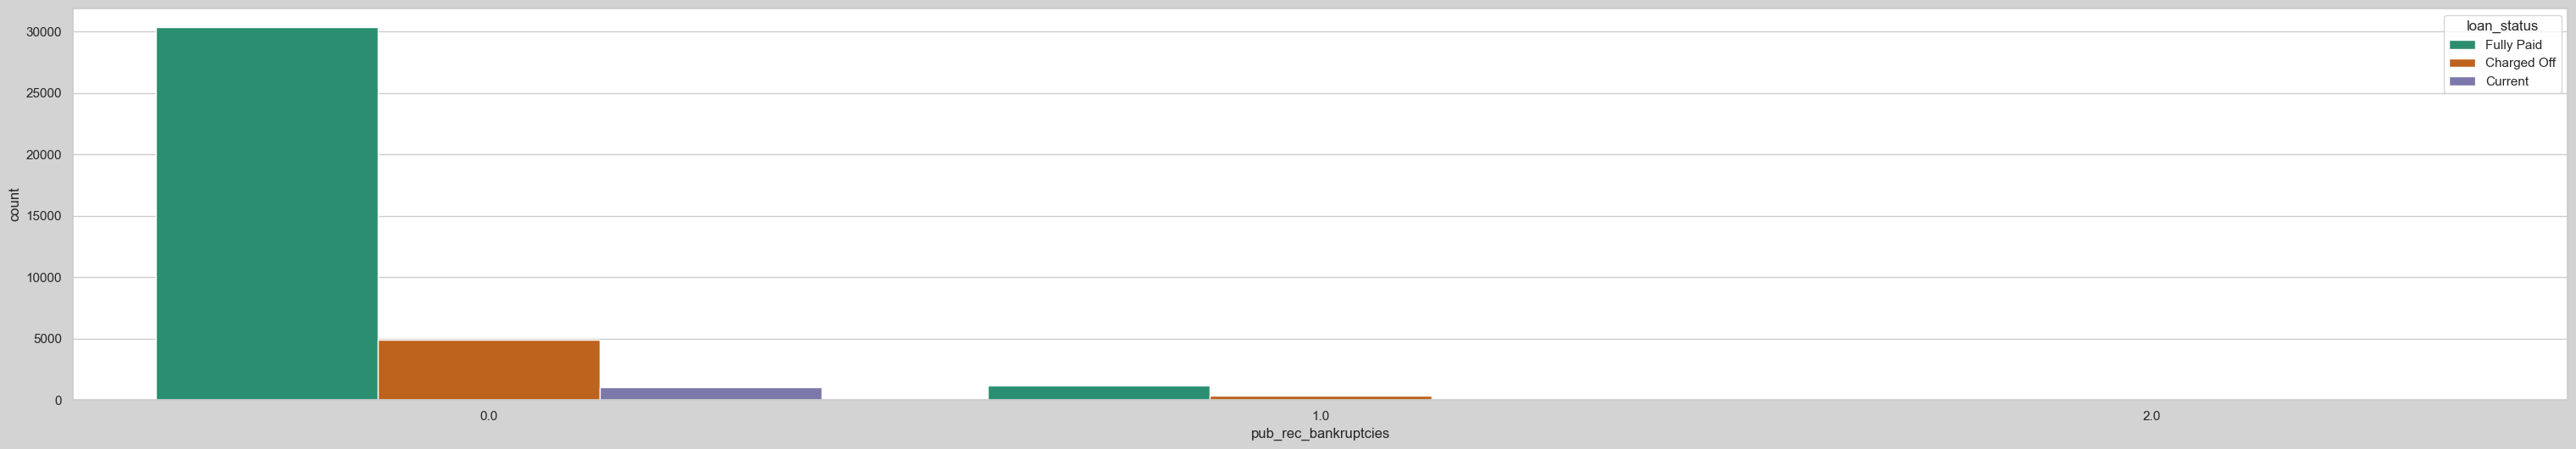

In [218]:
for col in cat_cols:
    plt.figure(figsize=(38, 6), facecolor='lightgray')
    sns.set(style="whitegrid")
    sns.countplot(x=col,data = df,hue='loan_status',palette='Dark2')
    plt.show()

#### Inferences from above graphs:

1. The loans for the period of 36 months are more likely to default.
2. Grade ‘B’ and 'C' are more prone to default.
3. The top 5 bars of defaulters are for Subgrades 'B5','B3','B4','C1'and 'C2'. Hence, making point 2 more strong.
4. emp_length of 10+ years are far more defaulters compared to others.
5. defaulters with ‘rented’ homes are more than 'mortgaged' house. ‘Own’ homes are comparatively very less
6. verified loans are more defaulters than source verified. Not verified loans are also close behind to default.
7. There has been somewhat linear growth in loan sanctions for Jun-07 to Dec-11
9. Max no. of defaulters are for ‘debt consolidation’
10. Max no. of defaulters are in CA (California)
11. Almost all the defaulters have ‘delinq_2yrs’ as 0
12. Majority of the defaulters have 0 inquiries in last 6 months
13. Almost all of the defaulters have 0 pub_rec
14. Almost all of the defaulters have 0 pub_rec_bankruptcies

#### Numerical vs Loan Status

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

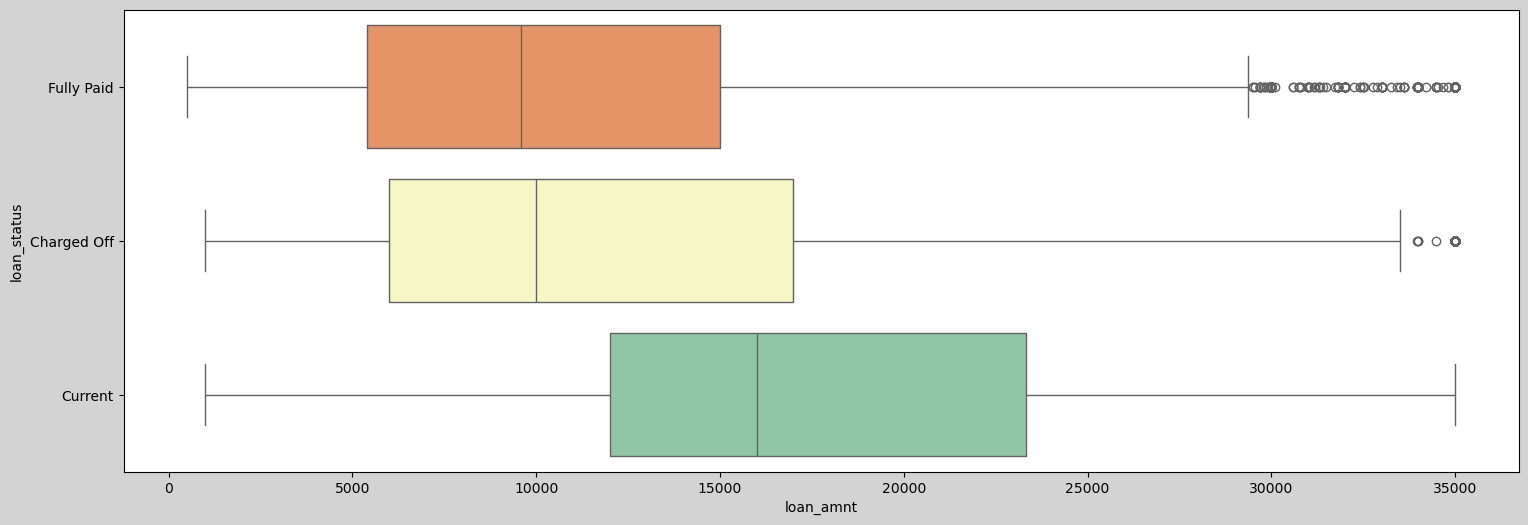

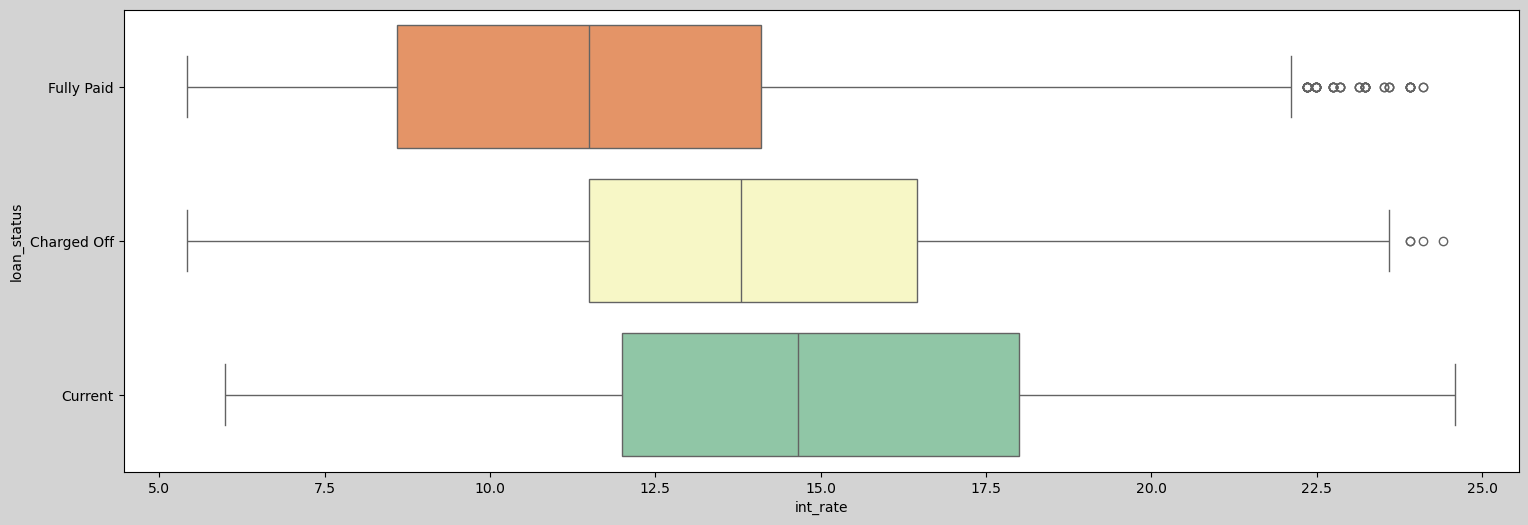

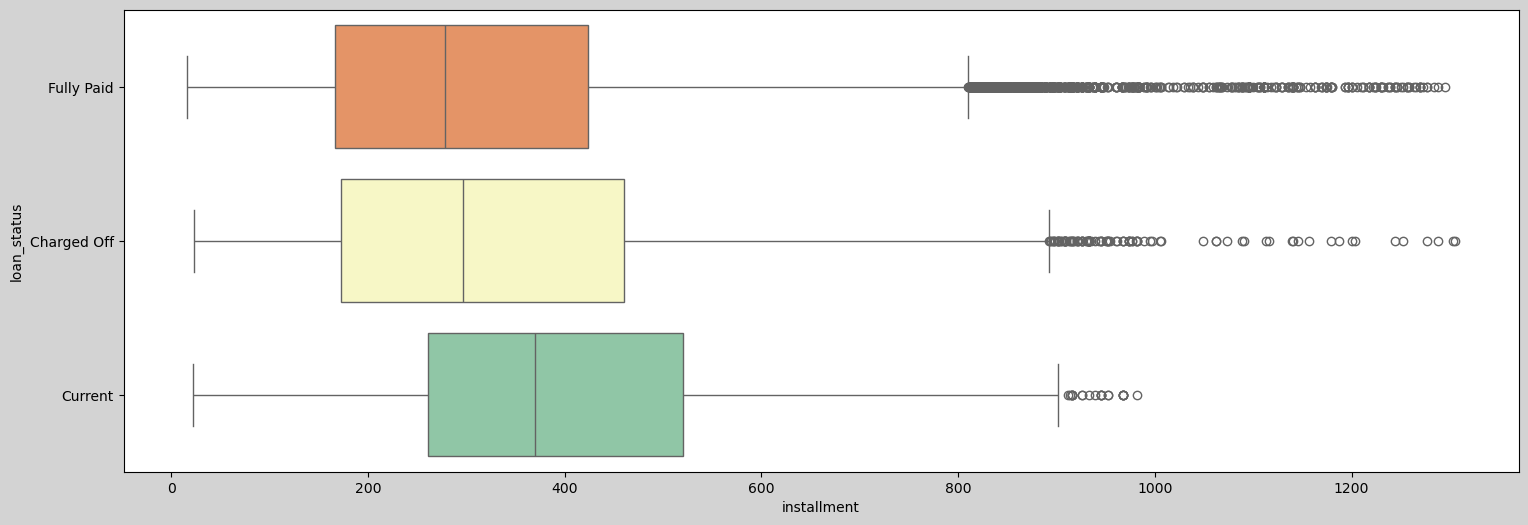

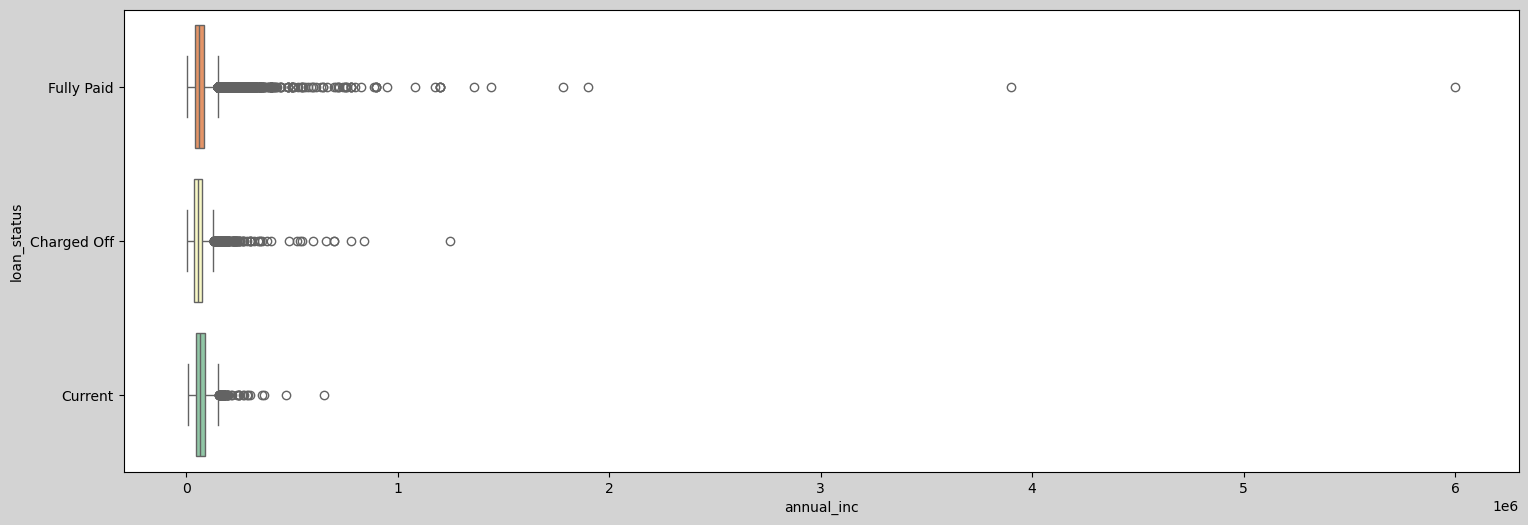

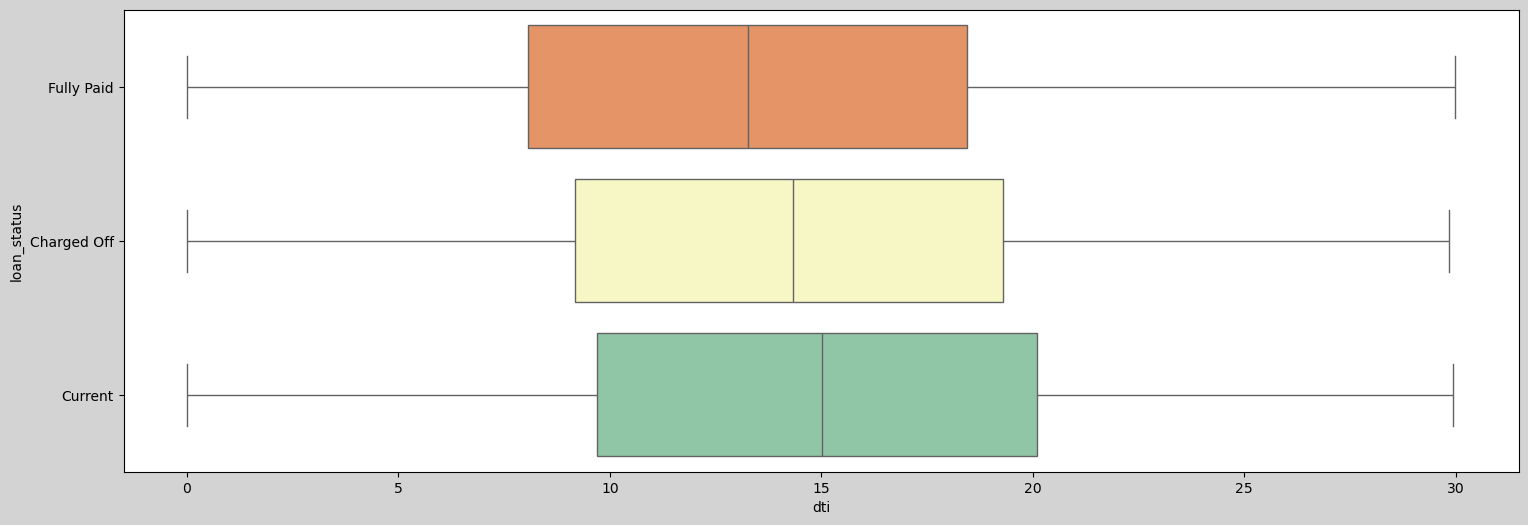

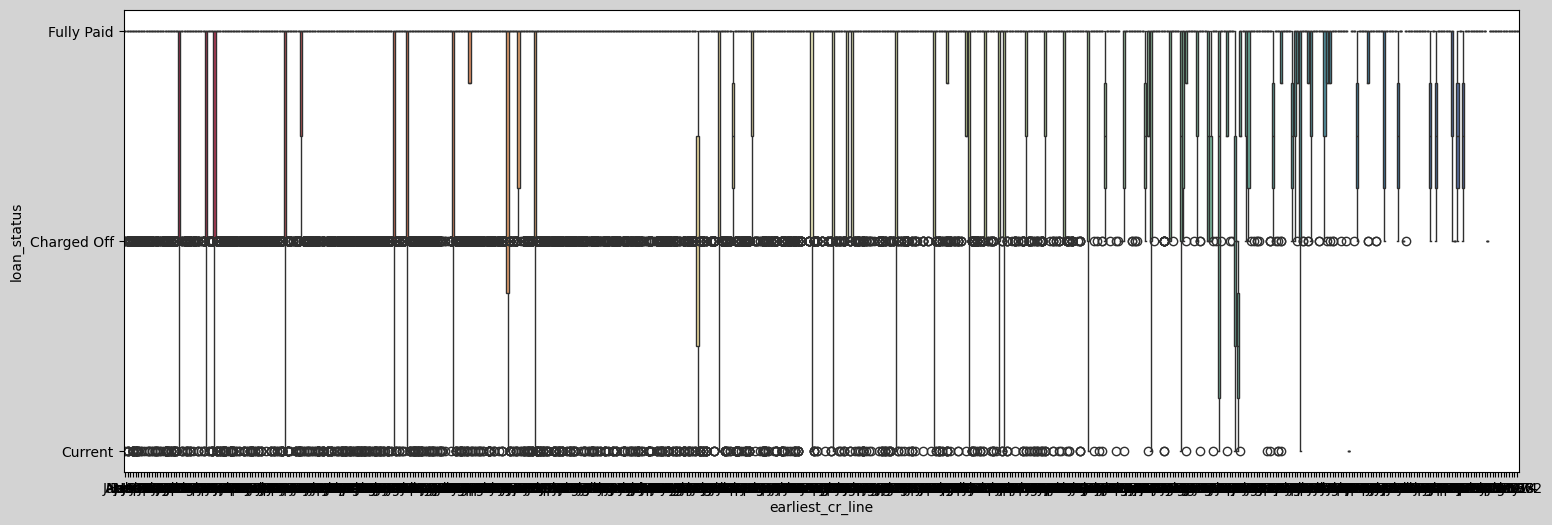

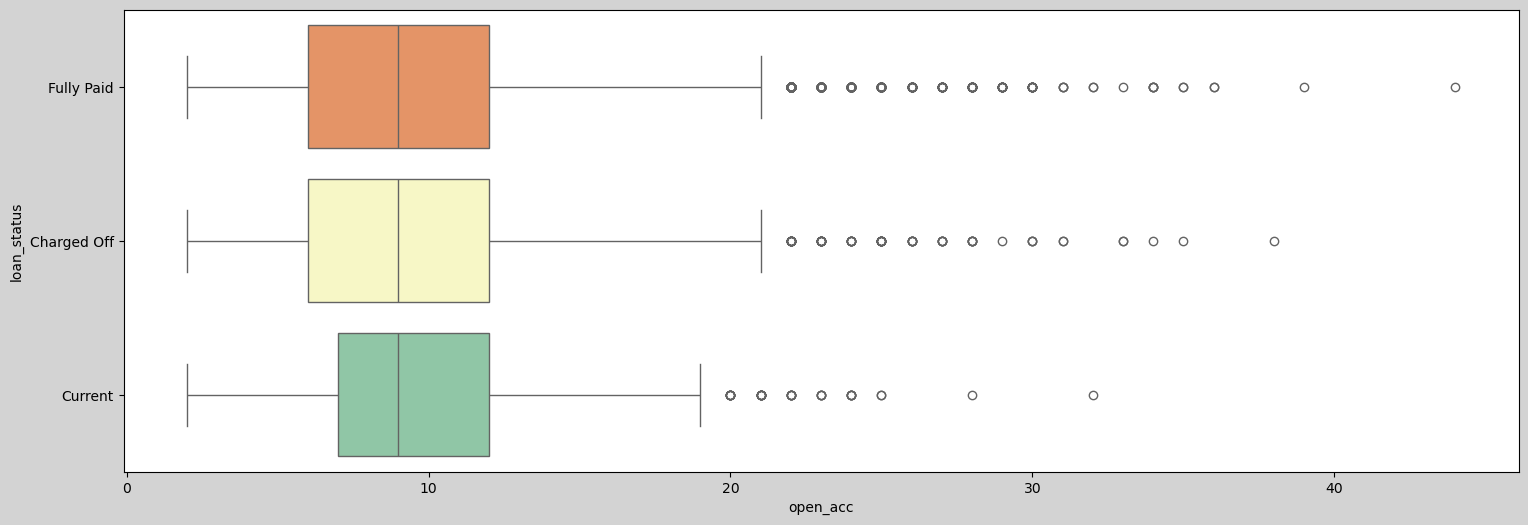

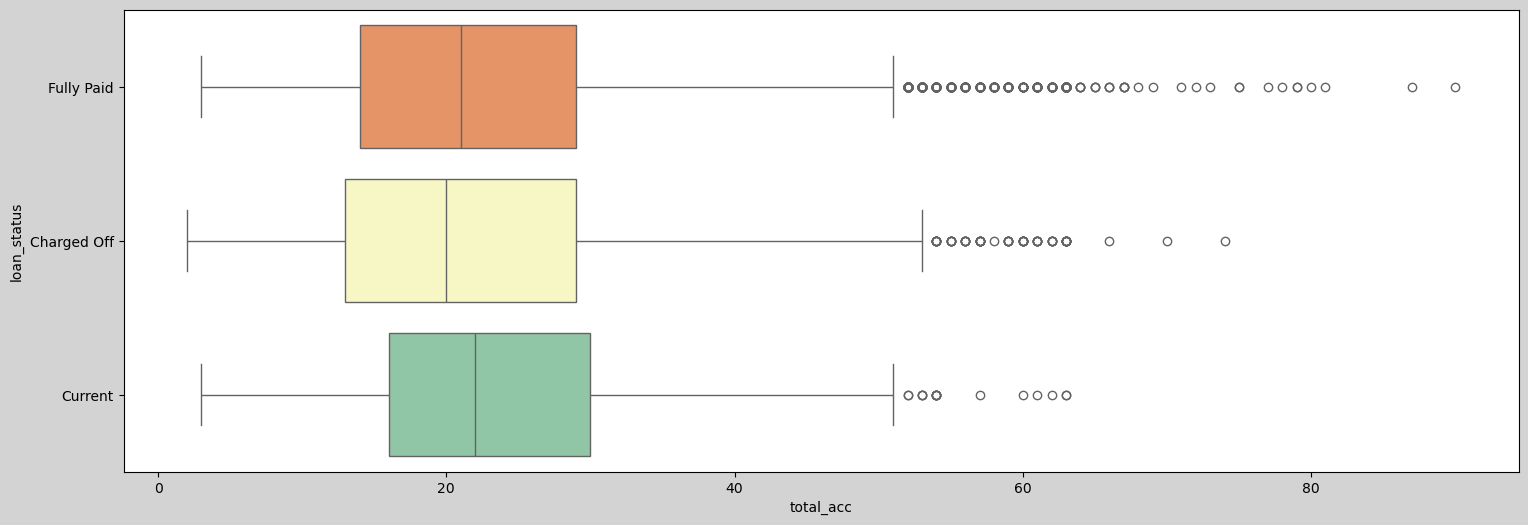

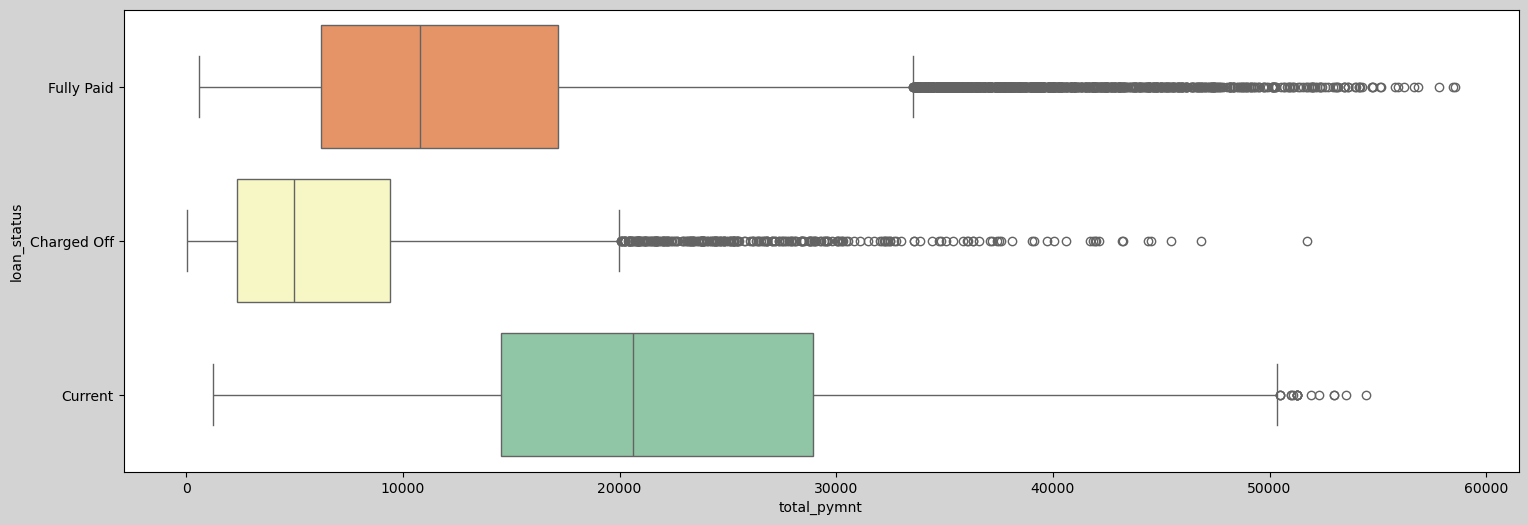

In [159]:
for col in num_cols:
    plt.figure(figsize=(18, 6), facecolor='lightgray')
    sns.reset_defaults()
    sns.boxplot(x=df[col],y=df_defaulters["loan_status"], palette='Spectral')
    plt.show()

## MultiVariate Analysis

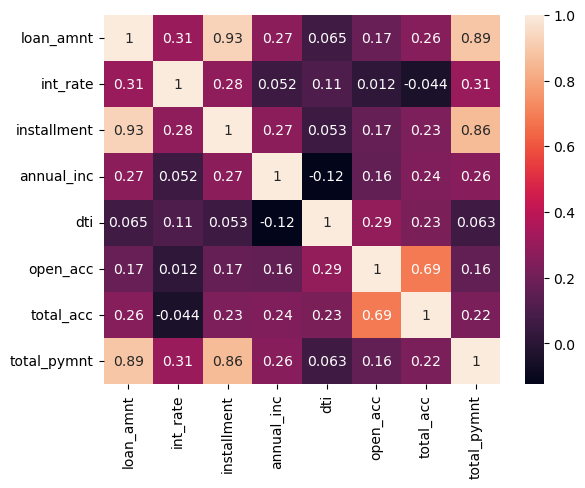

In [170]:
sns.heatmap(df_defaulters[num_cols].corr(), annot=True)
plt.show()